Initializing the python libraries

In [ ]:
import numpy as np                  ## this library is used for working with arrays 
import matplotlib.pyplot as plt     ## for plotting 
import time                         ## this library is used for computing various time related functions
np.random.seed(42)

Question 1 : the data_matrix function is taking number of samples and number of feature dimensions as input and at the output it provides X (Data Matrix). number of samples has been taken as 200 and feature_dimension has been taken as 20

In [ ]:
n= int(input('Enter the number of samples : '))    # number of samples = 200
feature_dim= int(input('Enter the number of feature dimension : '))  # number of feature dimensions =10
def data_matrix(n,feature_dim):
  X = np.zeros((n,feature_dim))   ## X represents the data Matrix of (200,10) 
  for i in range(feature_dim):    ## i iterates through the number of feature dimensions, so at each column genrated 200 random samples will be stored
    x = np.random.randn(n)        ## x stores the value of samples under a single feature dimension
    X[:,i] = x
  return X

Enter the number of samples : 200
Enter the number of feature dimension : 10


In [ ]:
X = data_matrix(n,feature_dim)     ##  X represents the data Matrix of (200,10)
print('The Data Matrix shape is : ' , X.shape)

The Data Matrix shape is :  (200, 10)


Question 2 : std_deviation function provides the standard deviation value at the output and it is taking user defined noise variance value as the input. 
And target function takes the Data_matrix , Weight vector and standard_deviation value as the input and provides target vector at the output.  

In [ ]:
def std_deviation():
  variance = float(input('Enter the value of noise variance : ')) ## variable variance stores the value of noise variance
  return variance**(0.5)                                          ## it returns the noise standard deviation value
W1 = np.random.randn(feature_dim + 1)                           ## W1 represents the weight vector of shape (11,) for target variable t, 1st value in the array represents bias value
X0 = np.ones((n,1))                    
X_new = np.hstack((X0 , X)) ## adding a new column which containing ones for incorporating the bias value
std = std_deviation()
#noise = std_deviation() * np.random.randn(n)  ## noise vector with zero mean and user defined standard deviation of shape (200,) 
def target(Data_matrix,W1, standard_deviation = std):
  t = np.zeros(Data_matrix.shape[0])                       ## t stores the target vector of shape (200,)
  noise = standard_deviation * np.random.randn(Data_matrix.shape[0])  ## noise vector with zero mean and user defined standard deviation of shape (200,)
  for j in range(Data_matrix.shape[0]):                    ## j iterates through the 200 samples
    weighted_sum = 0
    for k in range(Data_matrix.shape[1]):                  ## k iterates through the number of feature_dimensions
      weighted_sum = weighted_sum + (Data_matrix[j,k]*W1[k])
    target_value = weighted_sum + noise[j]                 ## target value is summation of the weighted sum of Data matrix and weight vector multiplication and then noise vector with user defined noise variance is added
    t[j] = target_value
  return t

Enter the value of noise variance : 0.9


In [ ]:
t = target(X_new , W1)
print('The shape of the target vector is : ' , t.shape)

The shape of the target vector is :  (200,)


Question 3 : output function takes Data Matrix and a new weight vector as the input and provides y (predicted output) at the output.

In [ ]:
W2 = np.random.randn(feature_dim + 1)   ## A new weight vector, W2 represents the weight vector of shape (11,) for output variable , 1st value in the array represents bias value
def output(Data_Matrix,W2):
  y = np.zeros(Data_Matrix.shape[0])  ## t stores the target vector of shape (200,)
  for j in range(Data_Matrix.shape[0]):
    weighted_sum = 0
    for k in range(Data_Matrix.shape[1]):
      weighted_sum = weighted_sum + (Data_Matrix[j,k]*W2[k]) 
    y[j] = weighted_sum              ## y is the weighted sum of Data Matrix and A new weight vector (W2) multiplication.

  return y

In [ ]:
y = output(X_new , W2)
print(" The shape of the output vector is : " , y.shape) 

 The shape of the output vector is :  (200,)


Question 4 : MSE function takes the number of samples, target vector and output vector as the input and provides Mean squared error between target and output vector at the output

In [ ]:
def MSE(samples,target,output):
  squared_error = 0               
  for i in range(samples):          ## i iterates through the number of samples (200)
    squared_error = squared_error + (target[i]-output[i])**2     ## this variable stores the the squared error between the target vector and output vector 
  MSE = squared_error / samples                                  ## MSE provides the mean squared error between target and output vector
  return MSE

In [ ]:
initial_Mean_squared_error = MSE(n,t,y)                    ## initial_Mean_squared_error defines the iitial MSE between target and output vector with initial weight vector W2
                                                          ## W2 weight vecor is inital weight vector of Output vector. Later applying Pseudo inverse and gradient descent we will 
                                                          ## get the optimal weight vector which will provide the Final MSE value

In [ ]:
initial_Mean_squared_error

21.10749559674119

In [ ]:
initial_NRMSE = np.sqrt(initial_Mean_squared_error) / np.std(t)        ## initial _NRMSE is the normalized Root mean squred value between target and output vector. 
                                                                      ## RMSE value is normalized by dividing the standard deviation of target vector

In [ ]:
initial_NRMSE

1.4572599037987692

Question 5 : lambda_value() function provides the user defined lambda2 valure at the output which is used for L2 regularization.
optimal_weight() function takes the lamba value, target vector, Data matrix with extra column of ones, number of features with the bias value and number of samples as the input provides the optimal weight vector , optimal output vector and optimal MSE value at the output after using pseudo inverse

In [ ]:
def lambda_value():
  lambda_value = float(input('Enter the value of lambda : '))
  return lambda_value
lambda_value = lambda_value()      ## it stores the user defined lambda value
def optimal_weight(lambda_value,target,Data,dimensions,samples):
  I = np.identity(dimensions)      ## it defines a identity matrix value of shape (11,11)
  W_optimal = np.dot(np.dot(np.linalg.inv(lambda_value*I + np.matmul(Data.T,Data)), Data.T  ),target)  ## it gives the optimal weight vector with optimal bias value at the 1st row at the output after using psudo inverse
  y_optimal = output(Data,W_optimal)                   ## Here output function is used to get the optimal output vector, Weight vector is taken as the optimal weight vector (W_optimal)
  MSE_optimal = MSE(samples , target , y_optimal)      ## Here MSE function is used to get the Optimal MSE value by using pseudo inverse, optimal output vector is used at the input
  return W_optimal, y_optimal, MSE_optimal

Enter the value of lambda : 0.01


In [ ]:
W_optimal, y_optimal, MSE_optimal= optimal_weight(lambda_value,t,X_new, (feature_dim + 1), n)
print('optimal weight vector shape is : ' , W_optimal.shape)
print('optimal output vector shape is : ' , y_optimal.shape)
print('optimal MSE value is : ' , MSE_optimal)

optimal weight vector shape is :  (11,)
optimal output vector shape is :  (200,)
optimal MSE value is :  0.815153358825757


Question 6 : gradient loss() function takes the data matrix with an extra column of ones, target vector, output vector and number of samples as the input and provides the gradient value of the loss function at the output

In [ ]:
def gradient_loss( data, target , output, samples):
  error = target - output         ## error vector stores the differece between the target and output vector
  gradient = (-1.0/samples) * np.dot(data.T , error)    ## gradient stores the gradient of MSE with respect to weight vector , which is calculatedd by the written equation
  return gradient  

In [ ]:
grad_loss_vector = gradient_loss( X_new, t, y, n)

In [ ]:
grad_loss_vector               ## it is vector of shape (11,) , where each value represents the gradient of MSE with respector to bias W0 and Different Weight values

array([ 1.0567638 ,  1.22838368,  0.2864796 ,  0.13543723,  2.2487085 ,
       -0.24978727, -0.26525109,  2.95884357, -1.07169444, -1.31069173,
        1.10864293])

In [ ]:
grad_loss_vector.shape

(11,)

Question 7 : norm_squared_l2 function takes W2 weight vector as the input and  provides the L2 norm's squared value at the output

In [ ]:
def norm_squared_l2( Weight):
  Weight_without_bias = Weight[1:]  ## excluding the bias W0 from the Weight vector W2
  l2_norm = np.sum(np.square(Weight_without_bias))  ## this equation gives the L2 norm squared value of weights after excluding bias value W0
  return l2_norm

In [ ]:
L2_norm_squared = norm_squared_l2(W2)
L2_norm_squared

6.487197149473536

In [ ]:
print('L2 norm of the vector W2 excluding bias W0 : ' , np.sqrt(L2_norm_squared))

L2 norm of the vector W2 excluding bias W0 :  2.546997673629392


Question 8 : grad_L2_norm() function takes weight vector W2 and dimensions = feature_dimension +1 as the input and gives gradient of L2 norm with respect to weight vectors

In [ ]:
def grad_L2_norm(Weights , dimensions):
  grad_l2norm = np.zeros(dimensions) 
  for i in range(1,dimensions):
    grad_l2norm[i] = 2 * Weights[i]   ## grad_l2norm stores the gradient of L2 norm which is calculated by the written equation , as the gradient of L2 norm w.r.t bias W0 is zero,
                                      ## that's why iteration is starting from i = 1
  return grad_l2norm 

In [ ]:
Grad_L2_norm = grad_L2_norm(W2, feature_dim+1)

In [ ]:
Grad_L2_norm

array([ 0.        ,  1.76466612, -0.90418067, -0.9400843 ,  0.53175646,
       -0.87343947, -0.13226523,  4.19944358, -0.4940514 , -0.7166803 ,
       -1.29508361])

In [ ]:
Grad_L2_norm.shape

(11,)

Question 9 :  norm_l1 function takes W2 weight vector as the input and  provides the L1 norm at the output

In [ ]:
def norm_l1( Weight):
  Weight_without_bias = Weight[1:]  ## excluding the bias W0
  l1_norm = np.sum(np.abs(Weight_without_bias))  ## this equation gives the L1 norm value of weights after excluding bias value W0
  return l1_norm

In [ ]:
L1_norm = norm_l1(W2)

In [ ]:
print('L1 norm of the vector W2 excluding bias W0 : ' , L1_norm)

L1 norm of the vector W2 excluding bias W0 :  5.925825570803351


Question 10: grad_L1_norm() function takes weight vector W2 as the input and gives gradient of L1 norm with respect to weight vectors

In [ ]:
def grad_L1_norm(Weights):
  grad_l1norm = np.where(Weights>0 , 1, -1)  ## if weight value is greater than 0, then its gradient will be 1 and if weight value is less than zero then its gradient will be -1
  grad_l1norm[0] = 0    ##  gradient of l1 norm w.r.t W0 is 0
  return grad_l1norm 

In [ ]:
Grad_L1_norm = grad_L1_norm(W2)

In [ ]:
Grad_L1_norm

array([ 0,  1, -1, -1,  1, -1, -1,  1, -1, -1, -1])

In [ ]:
Grad_L1_norm.shape

(11,)

Question 11 : Gradient_descent function takes the Data matrix with one extra column of ones , target vector, output vector , weight vector W2 , lambda 1 and lambda2 value , eta value as input and provides single update of weights , output value and MSE value at the output

In [ ]:
def Gradient_descent(data, target, output_ ,Weight, lambda1, lambda2, eta ):
  updated_Weight = Weight - eta * (gradient_loss( data, target, output_, data.shape[0]) + (lambda1 * grad_L1_norm(Weight)) + (lambda2 * grad_L2_norm(Weight, data.shape[1])))
  ## updated_weight stores the updated weight values after single iteration using gradient descent, the above equation is used for the single updation of weight values
  updated_output = output(data , updated_Weight)        ## it stores the updated output value after a single updation 
  updated_MSE = MSE(data.shape[0], target, updated_output)   ## it stores the updated MSE value after a single updation 
  return updated_Weight, updated_output, updated_MSE

In [ ]:
updated_Weight_after_single_iteration , updated_output_after_single_iteration, updated_MSE_after_single_iteration = Gradient_descent(X_new, t, y ,W2, 0.01, 0.01, 0.01 )
print('The updated Weight value after a single updation : ' , updated_Weight_after_single_iteration )
print('The updated output value after a single updation : ' , updated_output_after_single_iteration)
print('The updated MSE value after a single updation : ' , updated_MSE_after_single_iteration)

The updated Weight value after a single updation :  [ 0.59394769  0.86977276 -0.45476471 -0.47120251  0.24323797 -0.43403452
 -0.06336688  2.06961341 -0.23615935 -0.34506157 -0.65839873]
The updated output value after a single updation :  [ 0.62054654 -1.00774142  1.49071301  4.21567602  2.69343663  2.72375195
  0.55971312 -1.66238396 -3.04657326  3.03543131 -2.71650167 -0.75545155
 -2.55870888 -1.50660448 -1.10189378  2.62426335 -0.80812508  1.98841119
 -2.23288355  3.43501232 -2.69346749  0.79256779  1.14814389  1.69243593
 -0.3917859  -1.70046976 -0.43306834 -0.13838209  2.14374863  5.64680025
 -0.71146514  1.05485609  0.26913139  4.75286099 -1.67912166  1.83184794
  5.14762256 -1.74400554  0.15890987  3.81719639  0.38385006  1.00598011
  0.73585489 -2.55994597 -0.82939153 -2.38208905 -1.15967384 -0.22748333
 -0.39744436 -4.71215027  3.07593442 -0.07661775 -3.77979058 -0.70637623
  4.10742953  0.75825093  2.01332689  1.33701541 -0.41190705  0.52915124
  0.21857618  1.10162902  2.057

Question 12 : Linear_Regression function takes the Data Matrix , target vector , Weight vector, maximum iteration, initial_NRMSE, eta, min_change_NRMSE, lambda1 and lambda2 value as the input and it gives the Weight value  , output  , updated_NRMSE at the output after the maximum iteration or the normalized RMSE does not change by more than min_change_NRMSE

In [ ]:
def Linear_Regression(data, target, output, Weight,  max_iter , initial_NRMSE , eta = 0.01 , min_change_NRMSE=0.001, lambda1=0.01, lambda2 =0.01 ):
  previous_NRMSE = initial_NRMSE
  for i in range(max_iter):  ## i is iterating through the maximum value of iteration
    
    Weight, output, updated_MSE = Gradient_descent(data, target, output ,Weight, lambda1, lambda2 , eta) 
    ## This function provides single update of weights , output value and MSE value at the output
    updated_NRMSE = np.sqrt(updated_MSE) / np.std(target)  ## this stores the updated NRMSE value after each iteration
    change_NRMSE = np.abs(previous_NRMSE - updated_NRMSE ) ## it gives the difference between the updated_NRMSE and previous NRMSE value
    previous_NRMSE = updated_NRMSE                         
    if change_NRMSE <= min_change_NRMSE:                   ## if change in NRMSE is less than the min_change_NRMSE, then the loop breaks
        break
  return Weight, output , updated_NRMSE

In [ ]:
Final_W, Final_output, Final_NRMSE = Linear_Regression(X_new, t , y , W2 , 500 , initial_NRMSE)  ## 500 iteration is taken

In [ ]:
print(' Final NRMSE value after completing the iteration : ' , Final_NRMSE)

 Final NRMSE value after completing the iteration :  0.3491191393622549


In [ ]:
print(' initial NRMSE value : ' , initial_NRMSE)

 initial NRMSE value :  1.4572599037987692


In [ ]:
seed = np.arange(11,21,1)   ## seed array stores the different seed values for different experiments

Question 13 (a)

Trends : Variability among the validation NRMSE for different experiments are decreasing with increaing number number of training samples. As we know that , if we increase the number of training samples for training overfitting is decreased. So the variance or variability among the different experiments is also decreasing.

In [ ]:
training_number = int(input('Enter the total number of trainings, want to use for the experiment : '))  ## training number stores the total number of experiments for training
training_samples_list = []  ## it stores the training samples for different experiment
for i in range(training_number):
  training_samples = int(input('Enter the total number of training samples : '))  ## it stores number the training samples for a particular experiment
  training_samples_list.append(training_samples)

Enter the total number of trainings, want to use for the experiment : 5
Enter the total number of training samples : 50
Enter the total number of training samples : 100
Enter the total number of training samples : 150
Enter the total number of training samples : 200
Enter the total number of training samples : 250


In [ ]:
training_NRMSE_samples = np.zeros((len(seed), training_number))   ## this matrix represents the number of experiments or different seed numbers in the row (10rows) and total number
                                                                  ## of training samples in the column. For diffrent number of training samples Training NRMSE values will be stored 
                                                                  ## column wise and row will represent different number of experiments

validation_NRMSE_samples = np.zeros((len(seed), training_number))  ## This matrix stores the validation NRMSE value for different number of training samples and experiments
for i in range(len(seed)):                               ## i iterates through different random seeds 
  np.random.seed(seed[i])
  training_NRMSE = [] ## this list stores the NRMSE values for different training samples for a single experiment
  validation_NRMSE = []  ## this list stores the NRMSE values with different training samples for validation set for a single experiment
  for j in training_samples_list:      ## j iterates through the number of different training samples 

    X_train = data_matrix(j ,feature_dim)    ## This function gives the training data matrix depending upon the different number of training samples  
    X0_train = np.ones((j , 1))
    X_train_new = np.hstack((X0_train , X_train)) ## adding a new column for incorporating the bias value in the validation_set
    t_training = target(X_train_new , W1)         ## target vector for the training set
    X_validation = data_matrix(int(j*0.4) ,feature_dim)   ## It provides the validation set with sample size of 40% of training samples number
    X0_validation = np.ones((int(j*0.4) , 1))            
    X_validation_new = np.hstack((X0_validation , X_validation)) ## adding a new column for incorporating the bias value in the validation_set
    t_validation = target(X_validation_new , W1)                 ## target vector for the validation set
    W_optimal_training, y_optimal_training, MSE_training = optimal_weight(lambda_value, t_training , X_train_new, (feature_dim + 1), j)
    ## This function provides optimal weight vector , output vector of training samples and MSE value of training samples at the output after using pseudo inverse 
    NRMSE_training_value = np.sqrt(MSE_training) / np.std(t_training)  ## MSE value is normalized by dividing the MSE value with the standard deviation of target vector of training set
    
    y_validation = output( X_validation_new, W_optimal_training )   ## Now optimal weight vector which is got after using pseudo inverse on training samples is used 
                                                                    ## to calculate the output vector validation set
    
    MSE_validation = MSE(int(j*0.2),t_validation,y_validation)      ## MSE value of validation set is calculated
    NRMSE_validation_value = np.sqrt(MSE_validation) / np.std(t_validation)   ## MSE value is normalized
    training_NRMSE.append(NRMSE_training_value)
    validation_NRMSE.append(NRMSE_validation_value)
  training_NRMSE_samples[i,:] = training_NRMSE          ## training NRMSE value for a single experiment with different training samples is stored row wise in the matrix
  validation_NRMSE_samples[i,:] = validation_NRMSE      ## validation NRMSE value for a single experiment with different validation samples is stored row wise in the matrix

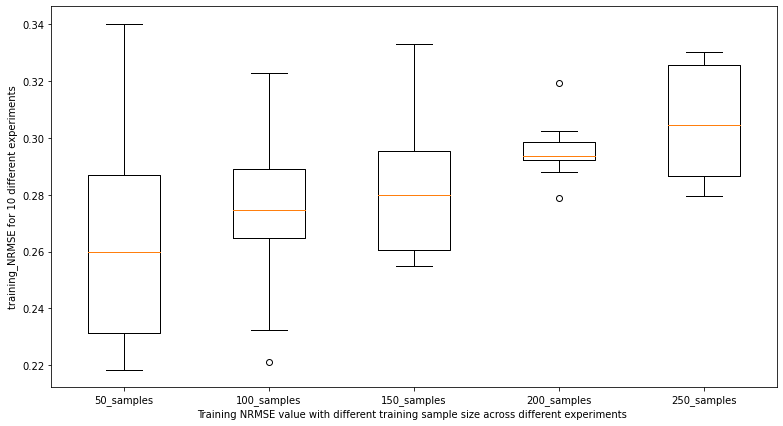

In [ ]:
fig = plt.figure(figsize =(13, 7))
plt.boxplot([training_NRMSE_samples[:,0],training_NRMSE_samples[:,1],training_NRMSE_samples[:,2],training_NRMSE_samples[:,3],training_NRMSE_samples[:,4]])
plt.ylabel('training_NRMSE for 10 different experiments')
plt.xticks([1,2,3,4,5], labels = ['50_samples', '100_samples','150_samples','200_samples','250_samples'])
plt.xlabel('Training NRMSE value with different training sample size across different experiments ')
plt.show()

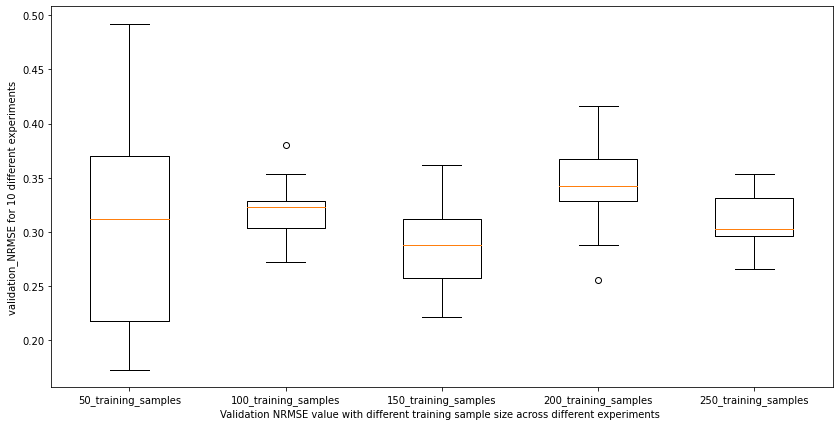

In [ ]:
fig = plt.figure(figsize =(14, 7))
plt.boxplot([validation_NRMSE_samples[:,0],validation_NRMSE_samples[:,1],validation_NRMSE_samples[:,2],validation_NRMSE_samples[:,3],validation_NRMSE_samples[:,4]])
plt.ylabel('validation_NRMSE for 10 different experiments')
plt.xticks([1,2,3,4,5], labels = ['50_training_samples', '100_training_samples','150_training_samples','200_training_samples','250_training_samples'])
plt.xlabel('Validation NRMSE value with different training sample size across different experiments ')
plt.show()

Question 13(b) :

Trends : Training and Validation NRMSE are decresing with increased number of variables or features. Also variability of training and validation NRMSE among the different experiments are also decreasing. As we know that increased features help ML models to perform better, but too many features may lead the ML models to overfitting.

In [ ]:
training_variables_list = []  ## it stores the number of training variables for different experiment
for i in range(training_number):
  training_variables = int(input('Enter the total number of training and validation variables : '))  ## it stores number the training and validation variables for a particular experiment
  training_variables_list.append(training_variables)

Enter the total number of training and validation variables : 4
Enter the total number of training and validation variables : 8
Enter the total number of training and validation variables : 12
Enter the total number of training and validation variables : 16
Enter the total number of training and validation variables : 20


In [ ]:
training_NRMSE_features = np.zeros((len(seed), training_number))  ## this matrix represents the number of experiments or different seed numbers in the row (10rows) and total number
                                                                  ## of training variables in the column. For diffrent number of training variables Training NRMSE values will be stored 
                                                                  ## column wise and row will represent different number of experiments

validation_NRMSE_features = np.zeros((len(seed), training_number))   ## This matrix stores the validation NRMSE value for different number of training variables and experiments
n_training = int(input('Enter the number of training samples : '))  ## it stores the number of training samples
for i in range(len(seed)):                 ## i iterates through different random seeds 
  np.random.seed(seed[i])      
  training_NRMSE_with_variables = [] ## this list stores the NRMSE values for different variables
  validation_NRMSE_with_variables = []  ## this list stores the NRMSE values with different variables for validation set
  for j in training_variables_list:      ## j iterates through the different variables number stored in the list
    X_train = data_matrix(n_training , j)   ## this function creates the training set with user defined training samples size and different variables
    X0_train = np.ones((n_training , 1))
    X_train_new = np.hstack((X0_train , X_train)) ## adding a new column for incorporating the bias value in the validation_set
    W = np.random.randn(j + 1)                          ## A new weight vector is generated of variables. 1st value represents the bias W0 value
    t_training = target(X_train_new , W)
    X_validation = data_matrix(int(n_training*0.2) , j)   ## this function creates the validation set with user defined training samples size and different variables
    X0_validation = np.ones((int(n_training*0.2) , 1))
    X_validation_new = np.hstack((X0_validation , X_validation)) ## adding a new column for incorporating the bias value in the validation_set
    t_validation = target(X_validation_new , W)
    W_optimal_training, y_optimal_training, MSE_training = optimal_weight(lambda_value, t_training , X_train_new, (j + 1), n_training)
    NRMSE_training_value = np.sqrt(MSE_training) / np.std(t_training)
    y_validation = output( X_validation_new, W_optimal_training )
    MSE_validation = MSE(int(n_training*0.2),t_validation,y_validation)
    NRMSE_validation_value = np.sqrt(MSE_validation) / np.std(t_validation)
    training_NRMSE_with_variables.append(NRMSE_training_value)
    validation_NRMSE_with_variables.append(NRMSE_validation_value)
  training_NRMSE_features[i,:] = training_NRMSE_with_variables     ## training NRMSE value for a single experiment with different training samples is stored row wise in the matrix
  validation_NRMSE_features[i,:] = validation_NRMSE_with_variables   ## validation NRMSE value for a single experiment with different validation samples is stored row wise in the matrix

Enter the number of training samples : 200


In [ ]:
X_train_new.shape

(200, 21)

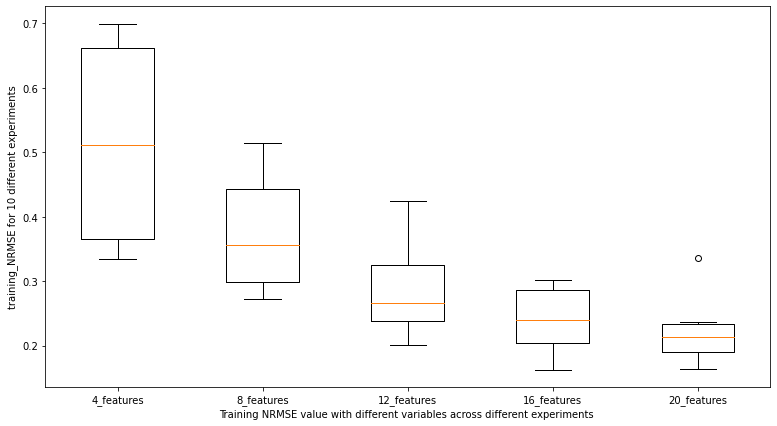

In [ ]:
fig = plt.figure(figsize =(13, 7))
plt.boxplot([training_NRMSE_features[:,0],training_NRMSE_features[:,1],training_NRMSE_features[:,2],training_NRMSE_features[:,3],training_NRMSE_features[:,4]])
plt.ylabel('training_NRMSE for 10 different experiments')
plt.xticks([1,2,3,4,5], labels = ['4_features', '8_features','12_features','16_features','20_features'])
plt.xlabel('Training NRMSE value with different variables across different experiments ')
plt.show()

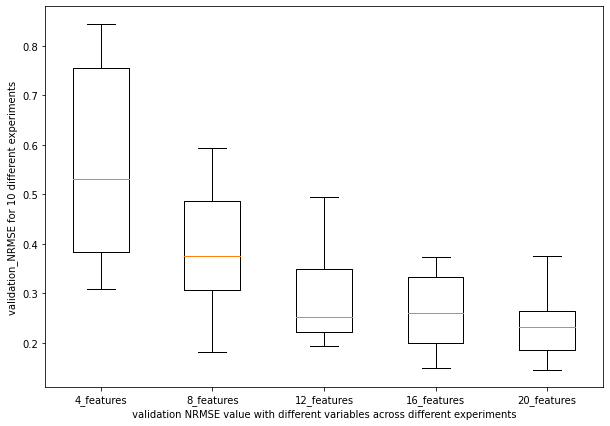

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot([validation_NRMSE_features[:,0],validation_NRMSE_features[:,1],validation_NRMSE_features[:,2],validation_NRMSE_features[:,3],validation_NRMSE_features[:,4]])
plt.ylabel('validation_NRMSE for 10 different experiments')
plt.xticks([1,2,3,4,5], labels = ['4_features', '8_features','12_features','16_features','20_features'])
plt.xlabel(' validation NRMSE value with different variables across different experiments ')
plt.show()

Question 13(c)

Trends : Increasing noise variance increased the training and Validation RMSE score. Because increasing noise variance, increases the error function, so the predicted output with increasing noise variance , is much more less than the target value. And subsequntly, NRMSE value for different experiments with increasing noise variance will be increasing.

In [ ]:
noise_variance_list = []  ## it stores the noise variance values 
for i in range(training_number):   
  noise_variances = float(input('Enter the noise variances : '))  ##takes noise variance value at the input
  noise_variance_list.append(noise_variances)

Enter the noise variances : 0.2
Enter the noise variances : 0.4
Enter the noise variances : 0.6
Enter the noise variances : 0.8
Enter the noise variances : 1.0


In [ ]:
training_NRMSE_noise_variance = np.zeros((len(seed), training_number))   ## This matrix stores the training NRMSE value for different noise variaces and experiments
validation_NRMSE_noise_variance = np.zeros((len(seed), training_number)) ## This matrix stores the validation NRMSE value for different noise variaces and experiments
n_training = int(input('Enter the number of training samples : '))  ## it stores the number of training samples
features = int(input('Enter the number of features : '))  ## it stores the number of training and validation set features
for i in range(len(seed)):      ## i is iterating through the number of experiments
  np.random.seed(seed[i])
  training_NRMSE_with_noise_variance = [] ## this list stores the training NRMSE values for different noise variance
  validation_NRMSE_with_noise_variance = []  ## this list stores the validation NRMSE for different noise variance
  W_variance = np.random.randn(features + 1)   ## a new weight vector is generated whose 1st values represents bias W0 value
  X_train = data_matrix(n_training , features)
  X0_train = np.ones((n_training , 1))
  X_train_new = np.hstack((X0_train , X_train)) ## adding a new column for incorporating the bias value in the validation_set
  X_validation = data_matrix(int(n_training*0.2) , features)
  X0_validation = np.ones((int(n_training*0.2) , 1))
  X_validation_new = np.hstack((X0_validation , X_validation)) ## adding a new column for incorporating the bias value in the validation_set
  for j in noise_variance_list:    ## j is iterating through a list which contains different noise variance values
    t_training = target(X_train_new , W_variance , (j**0.5))  
    t_validation = target(X_validation_new , W_variance , (j**0.5))
    W_optimal_training, y_optimal_training, MSE_training = optimal_weight(lambda_value, t_training , X_train_new, features+1 , n_training)
    NRMSE_training_value = np.sqrt(MSE_training) / np.std(t_training)
    y_validation = output( X_validation_new, W_optimal_training )
    MSE_validation = MSE(int(n_training*0.2), t_validation , y_validation)
    NRMSE_validation_value = np.sqrt(MSE_validation) / np.std(t_validation)
    training_NRMSE_with_noise_variance.append(NRMSE_training_value)
    validation_NRMSE_with_noise_variance.append(NRMSE_validation_value)
  training_NRMSE_noise_variance[i,:] = training_NRMSE_with_noise_variance   ## training NRMSE value for a single experiment with different noise variance is stored row wise in the matrix
  validation_NRMSE_noise_variance[i,:] = validation_NRMSE_with_noise_variance   ## validation NRMSE value for a single experiment with different noise variance which is stored row wise in the matrix

Enter the number of training samples : 150
Enter the number of features : 20


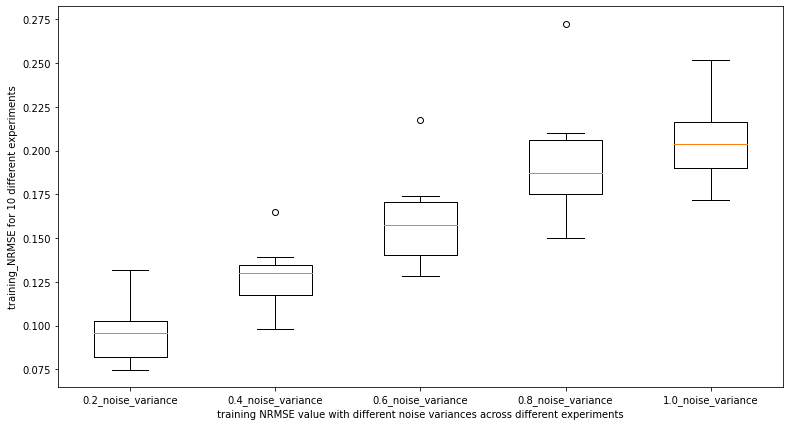

In [ ]:
fig = plt.figure(figsize =(13, 7))
plt.boxplot([training_NRMSE_noise_variance[:,0],training_NRMSE_noise_variance[:,1],training_NRMSE_noise_variance[:,2],training_NRMSE_noise_variance[:,3],training_NRMSE_noise_variance[:,4]])
plt.ylabel('training_NRMSE for 10 different experiments')
plt.xticks([1,2,3,4,5], labels = ['0.2_noise_variance', '0.4_noise_variance','0.6_noise_variance','0.8_noise_variance','1.0_noise_variance'])
plt.xlabel(' training NRMSE value with different noise variances across different experiments ')
plt.show()


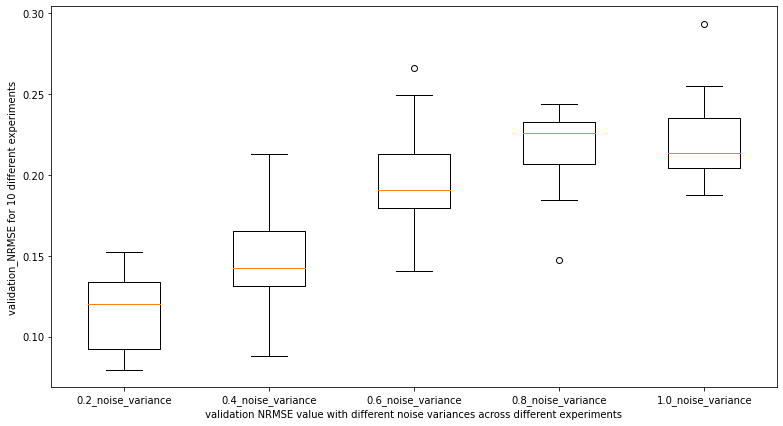

In [ ]:
fig = plt.figure(figsize =(13, 7))
plt.boxplot([validation_NRMSE_noise_variance[:,0],validation_NRMSE_noise_variance[:,1],validation_NRMSE_noise_variance[:,2],validation_NRMSE_noise_variance[:,3],validation_NRMSE_noise_variance[:,4]])
plt.ylabel('validation_NRMSE for 10 different experiments')
plt.xticks([1,2,3,4,5], labels = ['0.2_noise_variance', '0.4_noise_variance','0.6_noise_variance','0.8_noise_variance','1.0_noise_variance'])
plt.xlabel(' validation NRMSE value with different noise variances across different experiments ')
plt.show()

Question 13(d):

In [ ]:
bias_values = np.random.randn(training_number)    ## it stores different bias values 

In [ ]:
bias_values

array([ 1.52299782, -1.26165935, -1.18379558,  0.17816844,  0.34175659])

In [ ]:
training_NRMSE_W0 = np.zeros((len(seed) , training_number))     ## This matrix stores the training NRMSE value for different bias values and experiments
validation_NRMSE_W0 = np.zeros((len(seed) , training_number))   ## This matrix stores the validation NRMSE value for different bias values and experiments
n_training = int(input('Enter the number of training samples : '))  ## it stores the number of training samples
features = int(input('Enter the number of features : '))  ## it stores the number of training and validation set features
for i in range(len(seed)):        ## i is iterating through the number of different seeds or experiments
  np.random.seed(seed[i])
  training_NRMSE_with_differet_W0 = [] ## this list stores the NRMSE values for bias values for a single random seed value or single experiment for training set
  validation_NRMSE_with_different_W0 = []  ## this list stores the NRMSE values with different bias values for validation set for a single random seed value
  W_with_differet_W0 = np.random.randn(features + 1)   ## weight vector with a random W0 for a single experiment
  X_train = data_matrix(n_training , features)
  X0_train = np.ones((n_training , 1))
  X_train_new = np.hstack((X0_train , X_train)) ## adding a new column for incorporating the bias value in the validation_set
  X_validation = data_matrix(int(n_training*0.4) , features)   ## 40 % of total training samples have been used as the validation set
  X0_validation = np.ones((int(n_training*0.4) , 1))
  X_validation_new = np.hstack((X0_validation , X_validation)) ## adding a new column for incorporating the bias value in the validation_set
  for j in bias_values:             ## j is iterating through the different bias values which is stored in the 'bias_values' list for a single experiment
    W_with_differet_W0[0] = j       ## now the stored bias values in the list is replaced the bias value of W_with_different_W0 weight vector
    t_training = target(X_train_new , W_with_differet_W0 )  ## target vector for the training set is calculated
    t_validation = target(X_validation_new , W_with_differet_W0 )     ## target vector for the validation set is calculated
    W_optimal_training, y_optimal_training, MSE_training = optimal_weight(lambda_value, t_training , X_train_new, features+1 , n_training) 
    ## using pseudo inverse optimal weight vector has been calculated which is later used to determine the output vector of validation set
    NRMSE_training_value = np.sqrt(MSE_training) / np.std(t_training)
    y_validation = output( X_validation_new, W_optimal_training )
    MSE_validation = MSE(int(n_training*0.4), t_validation , y_validation)
    NRMSE_validation_value = np.sqrt(MSE_validation) / np.std(t_validation)
    training_NRMSE_with_differet_W0.append(NRMSE_training_value)
    validation_NRMSE_with_different_W0.append(NRMSE_validation_value)
  training_NRMSE_W0[i,:] = training_NRMSE_with_differet_W0          ## training NRMSE value for a single experiment with different bias values is stored row wise in the matrix
  validation_NRMSE_W0[i,:] = validation_NRMSE_with_different_W0  ## validation NRMSE value for a single experiment with different bias values is stored row wise in the matrix
  ## Here row of the matrix defines the different experiments or random seed values and column defines the different bias values

Enter the number of training samples : 200
Enter the number of features : 15


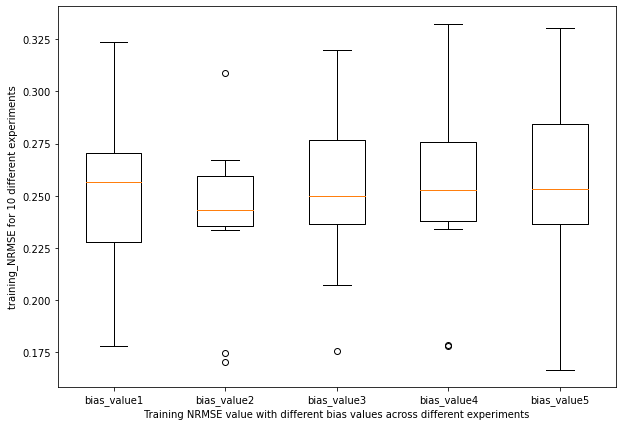

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot([training_NRMSE_W0[:,0],training_NRMSE_W0[:,1],training_NRMSE_W0[:,2],training_NRMSE_W0[:,3],training_NRMSE_W0[:,4]])
plt.ylabel('training_NRMSE for 10 different experiments')
plt.xticks([1,2,3,4,5], labels = ['bias_value1', 'bias_value2','bias_value3','bias_value4','bias_value5'])
plt.xlabel(' Training NRMSE value with different bias values across different experiments ')
plt.show()

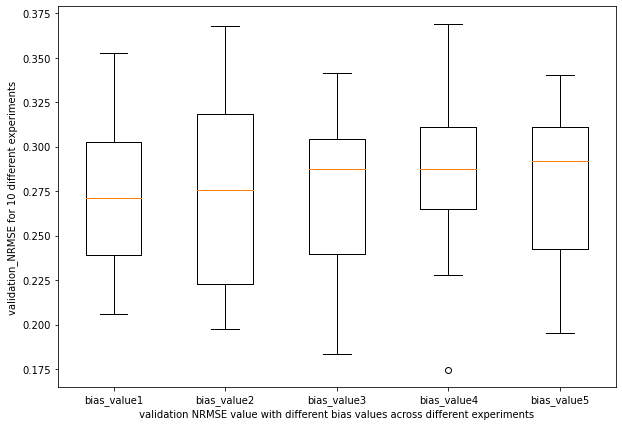

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot([validation_NRMSE_W0[:,0],validation_NRMSE_W0[:,1],validation_NRMSE_W0[:,2],validation_NRMSE_W0[:,3],validation_NRMSE_W0[:,4]])
plt.ylabel('validation_NRMSE for 10 different experiments')
plt.xticks([1,2,3,4,5], labels = ['bias_value1', 'bias_value2','bias_value3','bias_value4','bias_value5'])
plt.xlabel(' validation NRMSE value with different bias values across different experiments ')
plt.show()

Question 13(e)

Trends : Increasing lambda 2 value helps the ML model to reduce the overfitting problem. The same thing is being shown from these two graphs. Increasing lambda2 value increasing NRMSE value but the variablity among the training and validation NRMSE for different experiments are decreasing. So increasing lambda 2 value helps to reduce overfitting. But it tends the weight vector to the zero value, that's why the contour of the NRMSE value can't be able to attarct the weights around its center point (which is optimal value of weights for unregularized ML models). And NRMSE values are increasing.   

In [ ]:
n_training = int(input('Enter the number of training samples : '))  ## it stores the number of training samples
features = int(input('Enter the number of features : '))  ## it stores the number of training and validation set features
training_NRMSE_with_lambda2 = np.zeros((len(seed) , training_number)) ## This matrix stores the training NRMSE value for different lambda2 values and experiments
validation_NRMSE_with_lambda2 = np.zeros((len(seed) , training_number))  ## This matrix stores the validation NRMSE value for different lambda2 values and experiments
for i in range(len(seed)):    ## i is iterating through the different random seeds and experiments
  np.random.seed(seed[i])
  training_NRMSE_with_differet_lambda2 = [] ## this list stores the NRMSE values for different lambda2 values for a single experiment (training set)
  validation_NRMSE_with_different_lambda2 = []  ## this list stores the NRMSE values with different lambda2 values for validation set for a single experiment
  W_with_differet_lamda2 = np.random.randn(features + 1)    ## A new weight vector is generated for this problem
  X_train = data_matrix(n_training , features)
  X0_train = np.ones((n_training , 1))
  X_train_new = np.hstack((X0_train , X_train)) ## adding a new column for incorporating the bias value in the validation_set
  X_validation = data_matrix(int(n_training*0.2) , features)
  X0_validation = np.ones((int(n_training*0.2) , 1))
  X_validation_new = np.hstack((X0_validation , X_validation)) ## adding a new column for incorporating the bias value in the validation_set
  t_training = target(X_train_new , W_with_differet_lamda2 )   ## target vector for the training set is calculated
  t_validation = target(X_validation_new , W_with_differet_lamda2 )  ## target vector for the validation set is calculated
  for j in np.arange(1 , 10000 , 2000):        ## j is iterating from 1 to 10000 with 2000 steps in between.. so lambda2 values will be (0.01 * j).. j is the multiplication factor
    W_optimal_training, y_optimal_training, MSE_training = optimal_weight(lambda_value*j , t_training , X_train_new, features+1 , n_training)
    ## In the similar way using pseudo inverse optimal weight vector is calculated
    NRMSE_training_value = np.sqrt(MSE_training) / np.std(t_training)
    y_validation = output( X_validation_new, W_optimal_training )
    MSE_validation = MSE(int(n_training*0.2), t_validation , y_validation)
    NRMSE_validation_value = np.sqrt(MSE_validation) / np.std(t_validation)
    training_NRMSE_with_differet_lambda2.append(NRMSE_training_value)
    validation_NRMSE_with_different_lambda2.append(NRMSE_validation_value)
  training_NRMSE_with_lambda2[i,:] = training_NRMSE_with_differet_lambda2    ## training NRMSE value for a single experiment with different lambda2 values is stored row wise in the matrix
  validation_NRMSE_with_lambda2[i,:] = validation_NRMSE_with_different_lambda2   ## training NRMSE value for a single experiment with different lambda2 values is stored row wise in the matrix
   ## Here row of the matrix defines the different experiments or random seed values and column defines the different lambda2 values

Enter the number of training samples : 200
Enter the number of features : 20


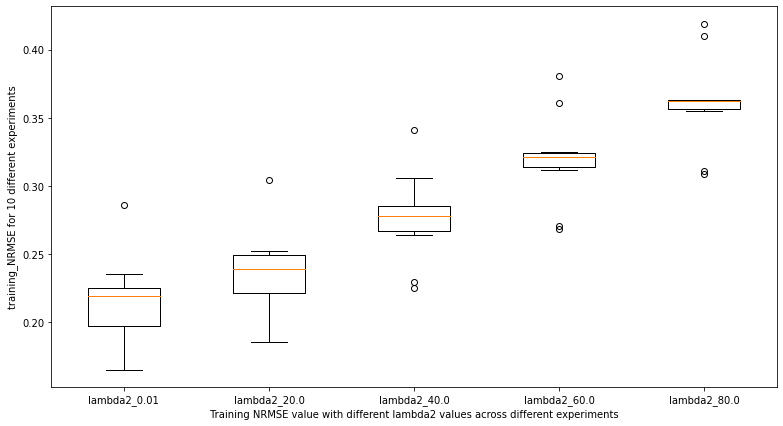

In [ ]:
fig = plt.figure(figsize =(13, 7))
plt.boxplot([training_NRMSE_with_lambda2[:,0],training_NRMSE_with_lambda2[:,1],training_NRMSE_with_lambda2[:,2],training_NRMSE_with_lambda2[:,3],training_NRMSE_with_lambda2[:,4]])
plt.ylabel('training_NRMSE for 10 different experiments')
plt.xticks([1,2,3,4,5], labels = ['lambda2_0.01', 'lambda2_20.0','lambda2_40.0','lambda2_60.0','lambda2_80.0'])
plt.xlabel(' Training NRMSE value with different lambda2 values across different experiments ')
plt.show()

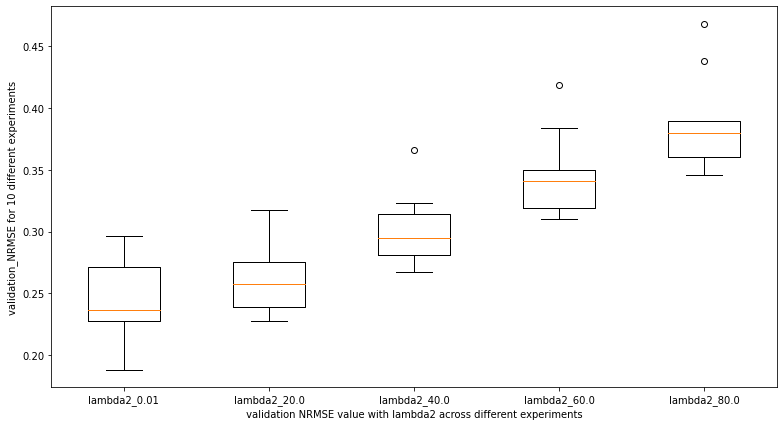

In [ ]:
fig = plt.figure(figsize =(13, 7))
plt.boxplot([validation_NRMSE_with_lambda2[:,0],validation_NRMSE_with_lambda2[:,1],validation_NRMSE_with_lambda2[:,2],validation_NRMSE_with_lambda2[:,3],validation_NRMSE_with_lambda2[:,4]])
plt.ylabel('validation_NRMSE for 10 different experiments')
plt.xticks([1,2,3,4,5], labels = ['lambda2_0.01', 'lambda2_20.0','lambda2_40.0','lambda2_60.0','lambda2_80.0'])
plt.xlabel(' validation NRMSE value with lambda2 across different experiments ')
plt.show()

Question 13 (f)

Time taken for differnt samples and features w.r.t number of samples and variables are not linear. 

In [ ]:
time_taken_for_different_samples = []     ## this list stores the time in second for different number of training samples
features = int(input("Enter the number of features / variables : "))  ## this variables stores the number of features
power = int(input('Enter the final value of power upto which the iterations will be happened : '))  ## it defines the 10's power of the final training sample size
W_samples = np.random.randn( features+1 )
for i in range(1 , power + 1):    ## i is iterating from 1 to power+1 (power is user defined input). It presents at the 1st 10 training samples have been taken. but as
## iteration (i) increases, training samples increases with 10^i
  X_train = data_matrix(10**i , features)     ## features or variables are constant here 
  X0_train = np.ones((10**i , 1))
  X_train_new = np.hstack((X0_train , X_train)) ## adding a new column for incorporating the bias value in the validation_set
  X_validation = data_matrix(int((10**i)*0.2) , features)
  X0_validation = np.ones(( int((10**i)*0.2) , 1))
  X_validation_new = np.hstack((X0_validation , X_validation)) ## adding a new column for incorporating the bias value in the validation_set  
  t_training = target(X_train_new , W_samples)
  t_validation = target(X_validation_new , W_samples)
  start_time = time.time()                    
  W_optimal_training, y_optimal_training, MSE_training = optimal_weight(lambda_value , t_training , X_train_new, features+1 , 10**i)
  end_time = time.time()              ## start_time and end_time stores the starting and ending time for calculating the pseudo inverse function for different samples
  time_taken_for_different_samples.append(end_time - start_time)   

Enter the number of features / variables : 10
Enter the final value of power upto which the iterations will be happened : 7


In [ ]:
## Here the data matrix size is (10^7 , 10) or (10000000, 10) , Breaking is occurred when 10^8 samples have been used with 10 features

time_taken_for_different_samples :  [0.005312442779541016, 0.0016388893127441406, 0.009190559387207031, 0.07433724403381348, 0.43651890754699707, 3.9907102584838867, 46.045878171920776]


Text(0.5, 1.0, 'time in sec vs time_taken_for_different_samples ')

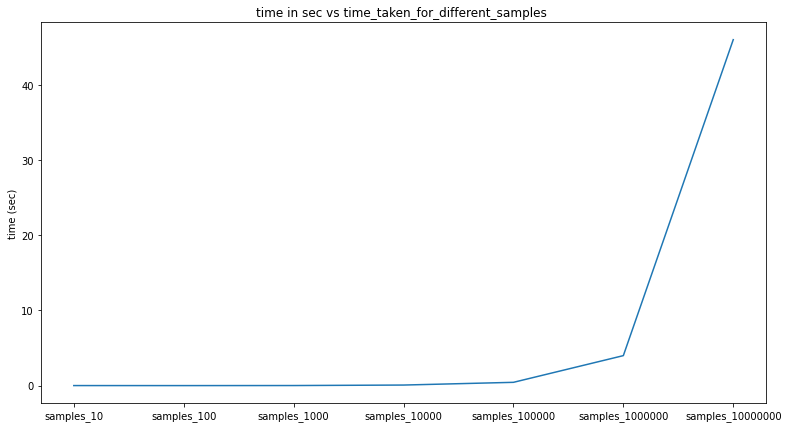

In [ ]:
fig = plt.figure(figsize=(13,7))
plt.plot(time_taken_for_different_samples )
plt.xticks([0,1,2,3,4,5,6], labels = ['samples_10', 'samples_100','samples_1000','samples_10000','samples_100000','samples_1000000','samples_10000000'])
plt.ylabel('time (sec)')
print('time_taken_for_different_samples : ' , time_taken_for_different_samples)
plt.title('time in sec vs time_taken_for_different_samples ')

In [ ]:
#This code is for the the time_taken_for_different features  

In [ ]:
time_taken_for_different_features = []   ## this list stores the time in second for different number of training and validation variables
n_samples = int(input("Enter the number of samples : "))  ## this variables stores the number of samples
power = int(input('Enter the final value of power upto which the iterations will be happened : '))  ## it defines the 10's power of the final training and validation variables
for i in range(1 , power + 1):    ## i is iterating from 1 to power+1 (power is user defined input). It represents at the 1st 10 training and validation variables have been taken. but as
## iteration (i) increases, training and validation variables increases with 10^i
  X_train = data_matrix(n_samples , 10**i)   ## number of training samples are constant here 
  X0_train = np.ones((n_samples , 1))
  X_train_new = np.hstack((X0_train , X_train)) ## adding a new column for incorporating the bias value in the validation_set
  X_validation = data_matrix(int(n_samples*0.2) , 10**i)
  X0_validation = np.ones(( int(n_samples*0.2) , 1))
  X_validation_new = np.hstack((X0_validation , X_validation)) ## adding a new column for incorporating the bias value in the validation_set 
  W_features = np.random.randn((10**i) + 1) 
  t_training = target(X_train_new , W_features)
  t_validation = target(X_validation_new , W_features)
  start_time = time.time()
  W_optimal_training, y_optimal_training, MSE_training = optimal_weight(lambda_value , t_training , X_train_new, (10**i)+1 , n_samples)
  end_time = time.time()
  time_taken_for_different_features.append(end_time - start_time)  ## start_time and end_time stores the starting and ending time for calculating the pseudo inverse function for different variables sizes

Enter the number of samples : 100
Enter the final value of power upto which the iterations will be happened : 4


time_taken_for_different_features :  [0.0015795230865478516, 0.015578985214233398, 0.17174553871154785, 66.57097053527832]


Text(0.5, 1.0, 'time in sec vs time_taken_for_different_features ')

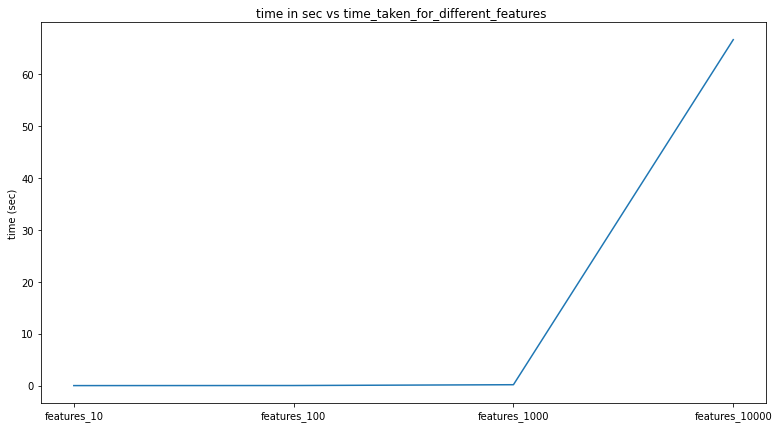

In [ ]:
fig = plt.figure(figsize = (13 , 7))
plt.plot(time_taken_for_different_features )
plt.xticks([0,1,2,3], labels = ['features_10', 'features_100','features_1000','features_10000'])
plt.ylabel('time (sec)')
print('time_taken_for_different_features : ' , time_taken_for_different_features)
plt.title('time in sec vs time_taken_for_different_features ')

In [ ]:
## Here the data matrix size is (100 , 10001)  , Breaking is occurred when 10^5 variables have been used with training 100 samples

Question 13(g) : The eta, lambda 1 and lambda 2 values are taken as constant


Trends : Increasing iteration value reduces the training and validation NRMSE value for different experiments. It also reduces the variability among the traing and validation NRMSE values for different experiments. This is beacause, as we know that the gradient descent is a convex optimization problem, which searches for the global minima. As less iteration does not lead the loss function at the global minima. so increasing iteration reduces training and validation NRMSE. 

In [ ]:
iteration_list = []  ## it stores the  number of maximum iterations for different experiment
for i in range(training_number):
  iterations = int(input('Enter maximum iteration value : '))  ## it stores number of the maximum iterations for a particular experiment
  iteration_list.append(iterations)

Enter maximum iteration value : 10
Enter maximum iteration value : 50
Enter maximum iteration value : 200
Enter maximum iteration value : 300
Enter maximum iteration value : 400


In [ ]:
training_NRMSE_with_iteration = np.zeros(( len(seed) , training_number)) ## This matrix stores the training NRMSE value for different iteration values and experiments
validation_NRMSE_with_iteration = np.zeros((len(seed) , training_number)) ## This matrix stores the validation NRMSE value for different iteration values and experiments
n_training = int(input('Enter the number of training samples : '))  ## it stores the number of training samples
features = int(input('Enter the number of features : '))  ## it stores the number of training and validation set features
for i in range(len(seed)):   ## i is iterating thruogh the number of different experiments or random seeds
  np.random.seed(seed[i])
  training_NRMSE_with_differet_iteration = []      ## this list stores the training NRMSE values for different iterations for a particular experiment
  validation_NRMSE_with_different_iteration = []  ## this list stores the validation NRMSE values for different iterations for a particular experiment
  W1_with_differet_iter = np.random.randn(features + 1)  ## It generates the new weight vector W1_with_differet_iter which is used for calculating target vector for the traininig and validation samples 
  W2_with_differet_iter = np.random.randn(features + 1)   ## It generates the new weight vector W2_with_differet_iter which is used for calculating output vector for the traininig samples
  X_train = data_matrix(n_training , features)     
  X0_train = np.ones((n_training , 1))
  X_train_new = np.hstack((X0_train , X_train)) ## adding a new column for incorporating the bias value in the validation_set
  X_validation = data_matrix(int(n_training*0.2) , features)
  X0_validation = np.ones((int(n_training*0.2) , 1))
  X_validation_new = np.hstack((X0_validation , X_validation)) ## adding a new column for incorporating the bias value in the validation_set
  t_training = target(X_train_new , W1_with_differet_iter)    ## it is calculating target vector for training samples using Weight vector W1_with_differet_iter
  y_training = output(X_train_new , W2_with_differet_iter)    ## it is calculating output vector for training samples using Weight vector W2_with_differet_iter
  t_validation = target(X_validation_new , W1_with_differet_iter)  ## it is calculating target vector for validation samples using Weight vector W1_with_differet_iter
  initial_MSE_itr = MSE(n_training,t_training,y_training)          ## this provides the initial Mean squared value of training samples using target vector and initial output vectore
  initial_NRMSE_itr = np.sqrt(initial_MSE_itr) / np.std(t_training) ## Then initial NRMSE value for the training samples has been calculated
  for j in iteration_list:      ## j is iterating through the itearation list
    Final_W_training, Final_output_training, Final_NRMSE_training = Linear_Regression(X_train_new, t_training , y_training , W2_with_differet_iter , j , initial_NRMSE_itr )
    ## Then final weight vector, output vector and final NRMSE value for training samples have been calculated after j iterations using Gradient Descent approach
    y_validation = output( X_validation_new, Final_W_training )   ## output vector for the validation samples have been calculated using the final Weight vector which is got after a 
    ## certain iteration using the training samples
    MSE_validation = MSE(int(n_training*0.2), t_validation , y_validation)  ## MSE value for the validation samples has been calculated using the target vector and output vector 
    ## of validation samples 
    NRMSE_validation_value = np.sqrt(MSE_validation) / np.std(t_validation)
    training_NRMSE_with_differet_iteration.append(Final_NRMSE_training)
    validation_NRMSE_with_different_iteration.append(NRMSE_validation_value)
  training_NRMSE_with_iteration[i,:] = training_NRMSE_with_differet_iteration ## training NRMSE value for a single experiment with different iterations is stored row wise in the matrix
  validation_NRMSE_with_iteration[i,:] = validation_NRMSE_with_different_iteration ## validation NRMSE value for a single experiment with different iterations is stored row wise in the matrix

Enter the number of training samples : 250
Enter the number of features : 10


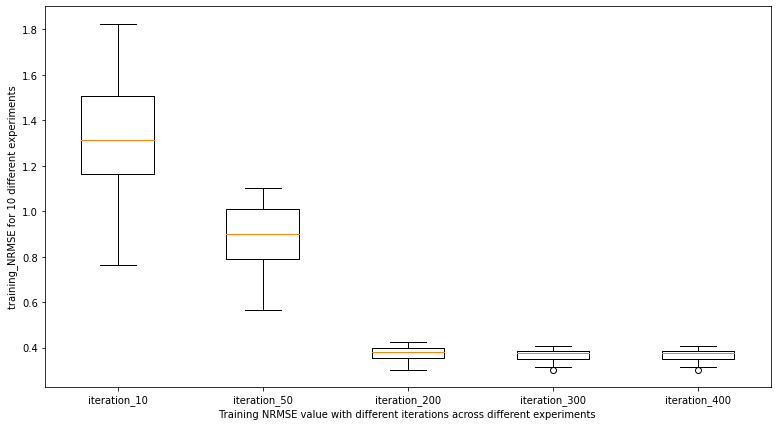

In [ ]:
fig = plt.figure(figsize =(13, 7))
plt.boxplot([training_NRMSE_with_iteration[:,0],training_NRMSE_with_iteration[:,1],training_NRMSE_with_iteration[:,2],training_NRMSE_with_iteration[:,3],training_NRMSE_with_iteration[:,4]])
plt.ylabel('training_NRMSE for 10 different experiments')
plt.xticks([1,2,3,4,5], labels = ['iteration_10', 'iteration_50','iteration_200','iteration_300','iteration_400'])
plt.xlabel(' Training NRMSE value with different iterations across different experiments ')
plt.show()

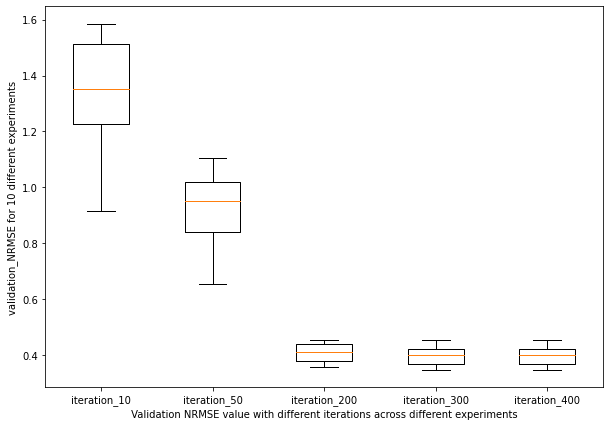

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot([validation_NRMSE_with_iteration[:,0],validation_NRMSE_with_iteration[:,1],validation_NRMSE_with_iteration[:,2],validation_NRMSE_with_iteration[:,3],validation_NRMSE_with_iteration[:,4]])
plt.ylabel('validation_NRMSE for 10 different experiments')
plt.xticks([1,2,3,4,5], labels = ['iteration_10', 'iteration_50','iteration_200','iteration_300','iteration_400'])
plt.xlabel(' Validation NRMSE value with different iterations across different experiments ')
plt.show()

Question 13 (h) : In this section same approach has been taken as 13 (g) , but with different eta values.. Here maximum iteration value, lambda 1 and lambda 2 values are taken as constant


Trends : Here maximum iteration is consatant. so increasing eta value leads the loss function to the global minima as fast as possible.  maximum iteration ,here it is 100, is not sufficient for the less eta value leads the loss function to the global minima. Thats why with increasing eta Training and validation NRMSE is decreasing.  

In [ ]:
eta_list = []  ## it stores the  number of eta values for experiment
for i in range(training_number):
  eta_values = float(input('Enter eta value : '))  ## it takes the eta value for a particular experiment
  eta_list.append(eta_values)

Enter eta value : 0.0001
Enter eta value : 0.001
Enter eta value : 0.01
Enter eta value : 0.1
Enter eta value : 1.0


In [ ]:
training_NRMSE_with_eta = np.zeros((len(seed), training_number))
validation_NRMSE_with_eta = np.zeros((len(seed), training_number))
n_training = int(input('Enter the number of training samples : '))  ## it stores the number of training samples
features = int(input('Enter the number of features : '))  ## it stores the number of training and validation set features
for i in range(len(seed)):
  np.random.seed(seed[i])
  training_NRMSE_with_differet_eta = []      ## this list stores the training NRMSE values for different eta values for a particular experiment
  validation_NRMSE_with_different_eta = []  ## this list stores the NRMSE values with different eta values for validation set for a particular experiment
  W1_with_differet_eta = np.random.randn(features + 1)
  W2_with_differet_eta = np.random.randn(features + 1)
  X_train = data_matrix(n_training , features)
  X0_train = np.ones((n_training , 1))
  X_train_new = np.hstack((X0_train , X_train)) ## adding a new column for incorporating the bias value in the validation_set
  X_validation = data_matrix(int(n_training*0.2) , features)
  X0_validation = np.ones((int(n_training*0.2) , 1))
  X_validation_new = np.hstack((X0_validation , X_validation)) ## adding a new column for incorporating the bias value in the validation_set
  t_training = target(X_train_new , W1_with_differet_eta)
  y_training = output(X_train_new , W2_with_differet_eta)
  t_validation = target(X_validation_new , W1_with_differet_eta)
  initial_MSE_eta = MSE(n_training,t_training,y_training)
  initial_NRMSE_eta = np.sqrt(initial_MSE_eta) / np.std(t_training)
  for j in eta_list:
    Final_W_training, Final_output_training, Final_NRMSE_training = Linear_Regression(X_train_new, t_training , y_training , W2_with_differet_eta ,  100 , initial_NRMSE_eta , eta = j )
    y_validation = output( X_validation_new, Final_W_training )
    MSE_validation = MSE(int(n_training*0.2), t_validation , y_validation)
    NRMSE_validation_value = np.sqrt(MSE_validation) / np.std(t_validation)
    training_NRMSE_with_differet_eta.append(Final_NRMSE_training)
    validation_NRMSE_with_different_eta.append(NRMSE_validation_value)
  training_NRMSE_with_eta[i,:] = training_NRMSE_with_differet_eta
  validation_NRMSE_with_eta[i,:] = validation_NRMSE_with_different_eta

Enter the number of training samples : 200
Enter the number of features : 20


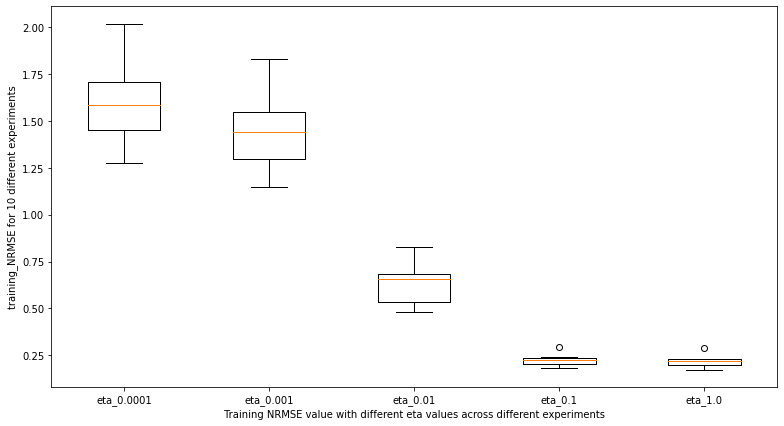

In [ ]:
fig = plt.figure(figsize =(13, 7))
plt.boxplot([training_NRMSE_with_eta[:,0],training_NRMSE_with_eta[:,1],training_NRMSE_with_eta[:,2],training_NRMSE_with_eta[:,3],training_NRMSE_with_eta[:,4]])
plt.ylabel('training_NRMSE for 10 different experiments')
plt.xticks([1,2,3,4,5], labels = ['eta_0.0001', 'eta_0.001','eta_0.01','eta_0.1','eta_1.0'])
plt.xlabel(' Training NRMSE value with different eta values across different experiments ')
plt.show()

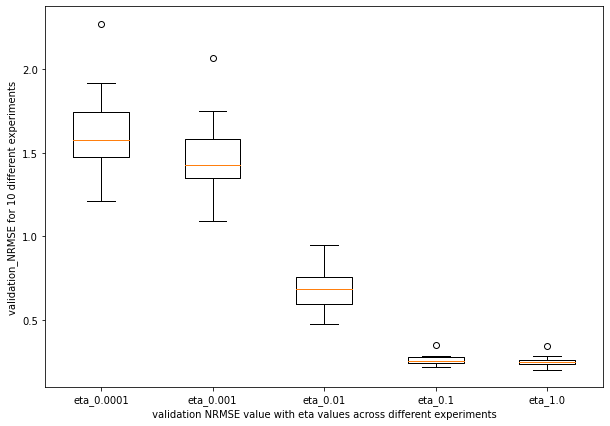

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot([validation_NRMSE_with_eta[:,0],validation_NRMSE_with_eta[:,1],validation_NRMSE_with_eta[:,2],validation_NRMSE_with_eta[:,3],validation_NRMSE_with_eta[:,4]])
plt.ylabel('validation_NRMSE for 10 different experiments')
plt.xticks([1,2,3,4,5], labels = ['eta_0.0001', 'eta_0.001','eta_0.01','eta_0.1','eta_1.0'])
plt.xlabel(' validation NRMSE value with eta values across different experiments ')
plt.show()

Question 13 (i) : This section has done the same thing as question 13(f) , but here gradient descent approach has been taken for counting the time taken for different number of training samples. And the approach is same as question 13 (g) , but with different training sample size

In [ ]:
time_taken_for_different_samples = []  ## This list stores the time_taken_for_different number of training samples
features = int(input("Enter the number of features / variables : "))  ## this variables stores the number of features
power = int(input('Enter the final value of power upto which the iterations will be happened : '))  ## it defines the final training and validation sample sizes
for i in range(1 , power + 1):
  X_train = data_matrix(10**i , features)
  X0_train = np.ones((10**i , 1))
  X_train_new = np.hstack((X0_train , X_train)) ## adding a new column for incorporating the bias value in the validation_set
  X_validation = data_matrix(int((10**i)*0.2) , features)
  X0_validation = np.ones((int((10**i)*0.2) , 1))
  X_validation_new = np.hstack((X0_validation , X_validation)) ## adding a new column for incorporating the bias value in the validation_set
  W1_samples = np.random.randn((10**i) + 1)
  W2_samples = np.random.randn((10**i) + 1)
  t_training = target(X_train_new , W1_samples)
  y_training = output(X_train_new , W2_samples)
  t_validation = target(X_validation_new , W1_samples)
  initial_MSE = MSE(10**i,t_training,y_training)
  initial_NRMSE = np.sqrt(initial_MSE) / np.std(t_training)
  start_time = time.time()
  Final_W_training, Final_output_training, Final_NRMSE_training = Linear_Regression(X_train_new, t_training , y_training , W2_samples ,  50 , initial_NRMSE , eta = 0.01 )
  end_time = time.time()
  time_taken_for_different_samples.append(end_time - start_time)

Enter the number of features / variables : 10
Enter the final value of power upto which the iterations will be happened : 6


time_taken_for_different_samples :  [0.0041501522064208984, 0.020847082138061523, 0.38842010498046875, 3.7748358249664307, 21.747864246368408, 193.23472380638123]


Text(0.5, 1.0, 'time in sec vs time_taken_for_different_samples ')

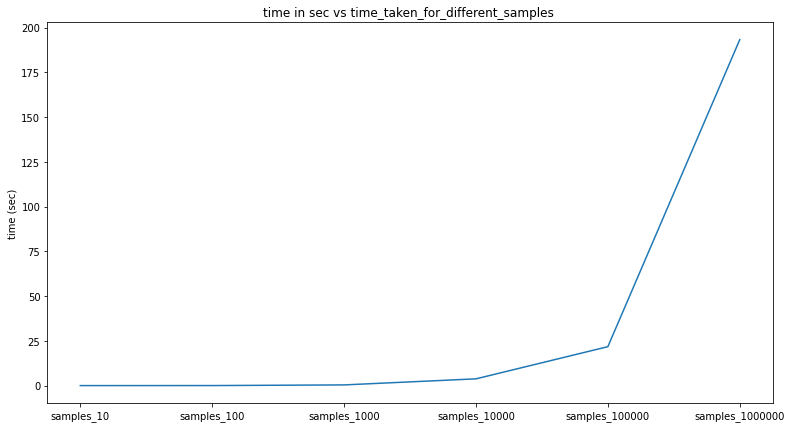

In [ ]:
fig = plt.figure(figsize=(13,7))
plt.plot(time_taken_for_different_samples )
plt.xticks([0,1,2,3,4,5], labels = ['samples_10', 'samples_100','samples_1000','samples_10000','samples_100000','samples_1000000'])
plt.ylabel('time (sec)')
print('time_taken_for_different_samples : ' , time_taken_for_different_samples)
plt.title('time in sec vs time_taken_for_different_samples ')

In [ ]:
## Here the data matrix size is ( 1000000 , 10)  , Breaking is occurred when 10^8 samples have been used with 10 variables

Question 13 (j) : this section has done the same thing but with same training samples but with different varaibles sizes

In [ ]:
time_taken_for_different_features = []
n_samples = int(input("Enter the number of samples : "))  ## this variable stores the number of samples
power = int(input('Enter the final value of power upto which the iterations will be happened : '))  ## it defines the final training and validation variables
for i in range(1 , power + 1):
  X_train = data_matrix(n_samples , 10**i)
  X0_train = np.ones((n_samples , 1))
  X_train_new = np.hstack((X0_train , X_train)) ## adding a new column for incorporating the bias value in the validation_set
  X_validation = data_matrix(int(n_samples*0.2) , 10**i)
  X0_validation = np.ones(( int(n_samples*0.2) , 1))
  X_validation_new = np.hstack((X0_validation , X_validation)) ## adding a new column for incorporating the bias value in the validation_set
  W1_features = np.random.randn((10**i) + 1)
  W2_features = np.random.randn((10**i) + 1)
  t_training = target(X_train_new , W1_features)
  y_training = output(X_train_new , W2_features)
  initial_MSE_features = MSE(n_samples,t_training,y_training)
  initial_NRMSE_features = np.sqrt(initial_MSE) / np.std(t_training)
  start_time = time.time()
  Final_W_training, Final_output_training, Final_NRMSE_training = Linear_Regression(X_train_new, t_training , y_training , W2_features ,  50 , initial_NRMSE_features , eta = 0.01 )
  end_time = time.time()
  time_taken_for_different_features.append(end_time - start_time)

Enter the number of samples : 100
Enter the final value of power upto which the iterations will be happened : 6


time_taken_for_different_features :  [0.025258302688598633, 0.28449153900146484, 2.705000877380371, 1.6481080055236816, 139.08620929718018, 1348.518180847168]


Text(0.5, 1.0, 'time in sec vs time_taken_for_different_features ')

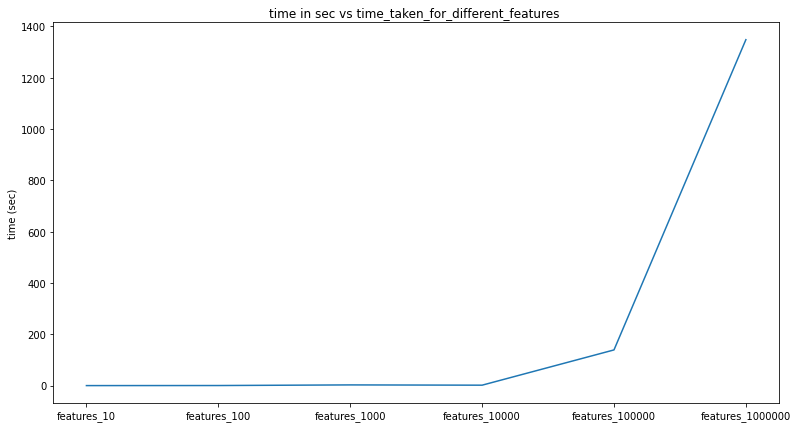

In [ ]:
fig = plt.figure(figsize = (13 , 7))
plt.plot(time_taken_for_different_features )
plt.xticks([0,1,2,3,4,5], labels = ['features_10', 'features_100','features_1000','features_10000','features_100000','features_1000000'])
plt.ylabel('time (sec)')
print('time_taken_for_different_features : ' , time_taken_for_different_features)
plt.title('time in sec vs time_taken_for_different_features ')

In [ ]:
## Here the data matrix size is ( 100 , 1000000)  , Breaking is occurred when 10^7 variables have been used with 100 training samples

Question 13 (k) : In this section same approach has been taken as 13 (g) , but with different lambda2 values.. Here maximum iteration value, eta value and  lambda 1 = 0  are taken as constant

Trends : Increasing lambda 2 value helps the ML model to reduce the overfitting problem. The same thing is being shown from these two graphs. Increasing lambda2 value increasing NRMSE value but the variablity among the training and validation NRMSE for different experiments are decreasing. So increasing lambda 2 value helps to reduce overfitting. But it tends the weight vector to the zero value, that's why the contour of the NRMSE value can't be able to attarct the weights around its center point (which is optimal value of weights for unregularized ML models). And NRMSE values are increasing.  

In [ ]:
lambda2_list = []  ## it stores the  number of lambda2 values for different experiment
for i in range(training_number):
  lambda2_values = float(input('Enter lambda2 value : '))  ## it stores lambda2 value for a particular experiment
  lambda2_list.append(lambda2_values)

Enter lambda2 value : 0.01
Enter lambda2 value : 0.1
Enter lambda2 value : 1.0
Enter lambda2 value : 10.0
Enter lambda2 value : 100.0


In [ ]:
training_NRMSE_with_lambda2 = np.zeros(( len(seed) , training_number))
validation_NRMSE_with_lambda2 = np.zeros(( len(seed) , training_number))
count_zero_weights_lambda2 = np.zeros(( len(seed) , training_number))
n_training = int(input('Enter the number of training samples : '))  ## it stores the number of training samples
features = int(input('Enter the number of features : '))  ## it stores the number of training and validation set features

for i in range(len(seed)):
  np.random.seed(seed[i])
  training_NRMSE_with_differet_lambda2 = []  ## this list stores the training NRMSE values for different lambda2 values for a particular experiment
  validation_NRMSE_with_different_lambda2 = []  ## this list stores the validation NRMSE values for different lambda2 values for a particular experiment
  count_zero_weights_with_lambda2 = []           ## this list stores the zero weight values for different lambda2
  W1_with_differet_lambda2 = np.random.randn(features + 1)
  W2_with_differet_lambda2 = np.random.randn(features + 1)
  X_train = data_matrix(n_training , features)
  X0_train = np.ones((n_training , 1))
  X_train_new = np.hstack((X0_train , X_train)) ## adding a new column for incorporating the bias value in the validation_set
  X_validation = data_matrix(int(n_training*0.2) , features)
  X0_validation = np.ones((int(n_training*0.2) , 1))
  X_validation_new = np.hstack((X0_validation , X_validation)) ## adding a new column for incorporating the bias value in the validation_set
  t_training = target(X_train_new , W1_with_differet_lambda2)
  y_training = output(X_train_new , W2_with_differet_lambda2)
  t_validation = target(X_validation_new , W1_with_differet_lambda2)
  initial_MSE_lambda2 = MSE(n_training,t_training,y_training)
  initial_NRMSE_lambda2 = np.sqrt(initial_MSE_lambda2) / np.std(t_training)
  for j in lambda2_list:
    Final_W_training, Final_output_training, Final_NRMSE_training = Linear_Regression(X_train_new, t_training , y_training , W2_with_differet_lambda2 , 100 , initial_NRMSE_lambda2 , lambda1 = 0.0, lambda2= j )
    y_validation = output( X_validation_new, Final_W_training )
    MSE_validation = MSE(int(n_training*0.2), t_validation , y_validation)
    NRMSE_validation_value = np.sqrt(MSE_validation) / np.std(t_validation)
    training_NRMSE_with_differet_lambda2.append(Final_NRMSE_training)
    validation_NRMSE_with_different_lambda2.append(NRMSE_validation_value)
    rounded_W_training = np.round(Final_W_training)       ## np.round() has been used to grt the nearly zero weight values
    count_zero_weights_with_lambda2.append(np.size(rounded_W_training) - np.count_nonzero(rounded_W_training))
  training_NRMSE_with_lambda2[i,:] = training_NRMSE_with_differet_lambda2
  validation_NRMSE_with_lambda2[i,:] = validation_NRMSE_with_different_lambda2
  count_zero_weights_lambda2[i,:] = count_zero_weights_with_lambda2   ## This matrix gives the number zero weight values including bias W0 in the rows for different experiments
  ## for a particular lambda2 vale

Enter the number of training samples : 200
Enter the number of features : 17


In [ ]:
print('the number of zero weight values for different experiments with changing lambda2 values  : ' ,  count_zero_weights_lambda2  )

## From the matrix it has been shown that at lambda2 =  10.0 values all the weight values including bias W0 is zero

the number of zero weight values for different experiments with changing lambda2 values  :  [[12. 12. 15. 18.  3.]
 [ 7.  7. 14. 17.  3.]
 [10. 10. 16. 18.  3.]
 [10. 11. 16. 17.  3.]
 [ 8. 10. 17. 17.  2.]
 [11. 11. 16. 17.  6.]
 [10. 10. 15. 17.  5.]
 [ 8.  8. 15. 17.  0.]
 [10. 10. 16. 18.  2.]
 [ 8.  8. 16. 17.  2.]]


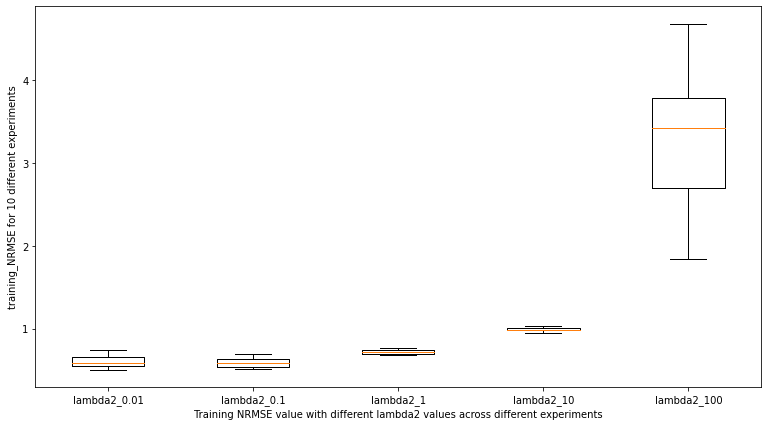

In [ ]:
fig = plt.figure(figsize=(13,7))
plt.boxplot([training_NRMSE_with_lambda2[:,0],training_NRMSE_with_lambda2[:,1],training_NRMSE_with_lambda2[:,2],training_NRMSE_with_lambda2[:,3],training_NRMSE_with_lambda2[:,4]])
plt.ylabel('training_NRMSE for 10 different experiments')
plt.xticks([1,2,3,4,5], labels = ['lambda2_0.01', 'lambda2_0.1','lambda2_1','lambda2_10','lambda2_100'])
plt.xlabel(' Training NRMSE value with different lambda2 values across different experiments ')
plt.show()

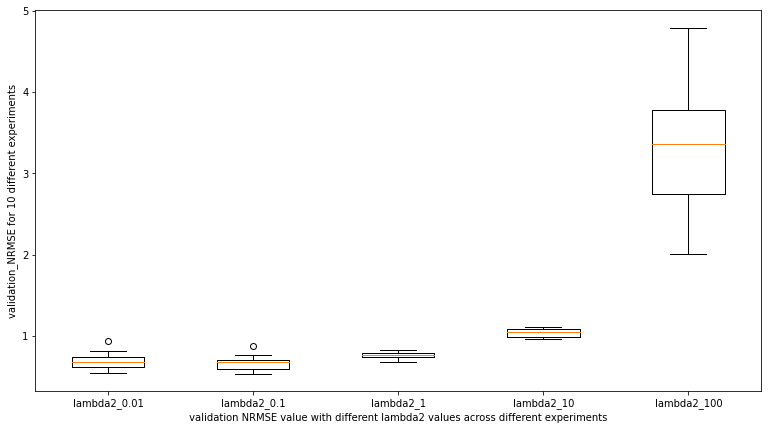

In [ ]:
fig = plt.figure(figsize=(13,7))
plt.boxplot([validation_NRMSE_with_lambda2[:,0],validation_NRMSE_with_lambda2[:,1],validation_NRMSE_with_lambda2[:,2],validation_NRMSE_with_lambda2[:,3],validation_NRMSE_with_lambda2[:,4]])
plt.ylabel('validation_NRMSE for 10 different experiments')
plt.xlabel(' validation NRMSE value with different lambda2 values across different experiments ')
plt.xticks([1,2,3,4,5], labels = ['lambda2_0.01', 'lambda2_0.1','lambda2_1','lambda2_10','lambda2_100'])
plt.show()

Question 13 (l) : In this section same approach has been taken as 13 (g) , but with different lambda1 values.. Here maximum iteration value, eta value and  lambda2 = 0  are taken as constant

Trends : Increasing lambda1 value helps the ML model to reduce the overfitting problem. The same thing is being shown from these two graphs. Increasing lambda2 value increasing NRMSE value but the variablity among the training and validation NRMSE for different experiments are decreasing. So increasing lambda 1 value helps to reduce overfitting value. But it tends the weight vector to the zero value, that's why the contour of the NRMSE value can't be able to attarct the weights around its center point (which is optimal value of weights for unregularized ML models). And NRMSE values are increasing.  

In [ ]:
lambda1_list = []  ## it stores the  number of lambda1 values for different experiment
for i in range(training_number):
  lambda1_values = float(input('Enter lambda1 value : '))  ## it stores lambda1 value for a particular experiment
  lambda1_list.append(lambda1_values)

Enter lambda1 value : 0.01
Enter lambda1 value : 0.1
Enter lambda1 value : 1.0
Enter lambda1 value : 10.0
Enter lambda1 value : 100.0


In [ ]:
training_NRMSE_with_lambda1 = np.zeros(( len(seed) , training_number))
validation_NRMSE_with_lambda1 = np.zeros(( len(seed) , training_number))
count_zero_weights_lambda1 = np.zeros(( len(seed) , training_number))
n_training = int(input('Enter the number of training samples : '))  ## it stores the number of training samples
features = int(input('Enter the number of features : '))  ## it stores the number of training and validation set features

for i in range(len(seed)):
  training_NRMSE_with_differet_lambda1 = []  ## this list stores the training NRMSE values for different lambda1 values for a particular experiment
  validation_NRMSE_with_different_lambda1 = []  ##  this list stores the validation NRMSE values for different lambda1 values for a particular experiment
  count_zero_weights_with_lambda1 = []           ## this list stores the zero weight values for different lambda1
  W1_with_differet_lambda1 = np.random.randn(features + 1)
  W2_with_differet_lambda1 = np.random.randn(features + 1)
  X_train = data_matrix(n_training , features)
  X0_train = np.ones((n_training , 1))
  X_train_new = np.hstack((X0_train , X_train)) ## adding a new column for incorporating the bias value in the validation_set
  X_validation = data_matrix(int(n_training*0.2) , features)
  X0_validation = np.ones((int(n_training*0.2) , 1))
  X_validation_new = np.hstack((X0_validation , X_validation)) ## adding a new column for incorporating the bias value in the validation_set
  t_training = target(X_train_new , W1_with_differet_lambda1)
  y_training = output(X_train_new , W2_with_differet_lambda1)
  t_validation = target(X_validation_new , W1_with_differet_lambda1)
  initial_MSE_lambda1 = MSE(n_training,t_training,y_training)
  initial_NRMSE_lambda1 = np.sqrt(initial_MSE_lambda1) / np.std(t_training)
  for j in lambda1_list:
    Final_W_training, Final_output_training, Final_NRMSE_training = Linear_Regression(X_train_new, t_training , y_training , W2_with_differet_lambda1 , 100 , initial_NRMSE_lambda1 , lambda1 = j, lambda2= 0.0 )
    y_validation = output( X_validation_new, Final_W_training )
    MSE_validation = MSE(int(n_training*0.2), t_validation , y_validation)
    NRMSE_validation_value = np.sqrt(MSE_validation) / np.std(t_validation)
    training_NRMSE_with_differet_lambda1.append(Final_NRMSE_training)
    validation_NRMSE_with_different_lambda1.append(NRMSE_validation_value)
    rounded_W_training = np.round(Final_W_training)
    count_zero_weights_with_lambda1.append(np.size(rounded_W_training) - np.count_nonzero(rounded_W_training))
  training_NRMSE_with_lambda1[i,:] = training_NRMSE_with_differet_lambda1
  validation_NRMSE_with_lambda1[i,:] = validation_NRMSE_with_different_lambda1
  count_zero_weights_lambda1[i,:] = count_zero_weights_with_lambda1

Enter the number of training samples : 200
Enter the number of features : 10


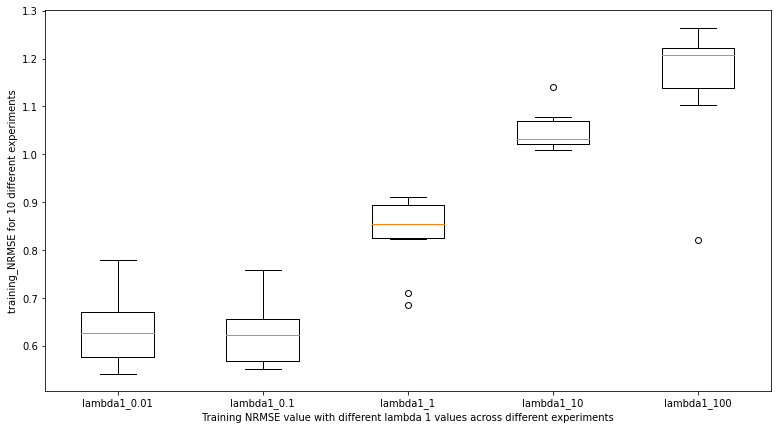

In [ ]:
fig = plt.figure(figsize=(13,7))
plt.boxplot([training_NRMSE_with_lambda1[:,0],training_NRMSE_with_lambda1[:,1],training_NRMSE_with_lambda1[:,2],training_NRMSE_with_lambda1[:,3],training_NRMSE_with_lambda1[:,4]])
plt.ylabel('training_NRMSE for 10 different experiments')
plt.xticks([1,2,3,4,5], labels = ['lambda1_0.01', 'lambda1_0.1','lambda1_1','lambda1_10','lambda1_100'])
plt.xlabel(' Training NRMSE value with different lambda 1 values across different experiments ')
plt.show()

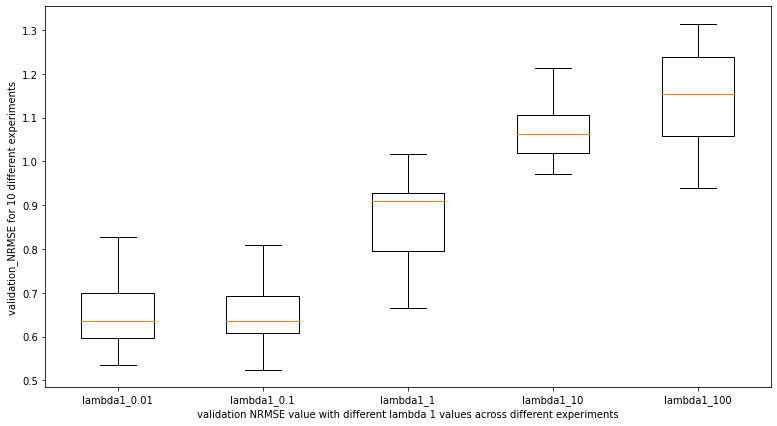

In [ ]:
fig = plt.figure(figsize=(13,7))
plt.boxplot([validation_NRMSE_with_lambda1[:,0],validation_NRMSE_with_lambda1[:,1],validation_NRMSE_with_lambda1[:,2],validation_NRMSE_with_lambda1[:,3],validation_NRMSE_with_lambda1[:,4]])
plt.ylabel('validation_NRMSE for 10 different experiments')
plt.xlabel(' validation NRMSE value with different lambda 1 values across different experiments ')
plt.xticks([1,2,3,4,5], labels = ['lambda1_0.01', 'lambda1_0.1','lambda1_1','lambda1_10','lambda1_100'])
plt.show()

In [ ]:
print('the number of zero weight values for different experiments with changing lambda1 values  : ' ,  count_zero_weights_lambda1  )

## From the matrix it has been shown that at lambda2 =  10.0 values all the weight values including bias W0 is zero

the number of zero weight values for different experiments with changing lambda1 values  :  [[ 5.  5.  9. 10.  2.]
 [ 6.  7. 11. 11.  7.]
 [ 4.  4. 10. 11.  6.]
 [ 9.  9.  9. 10.  6.]
 [ 5.  5.  8.  9.  6.]
 [ 6.  6.  9. 10.  7.]
 [ 4.  4.  9. 11.  5.]
 [ 5.  5.  8.  8.  7.]
 [ 5.  6.  6. 11.  5.]
 [ 5.  6.  8. 10.  3.]]


Question 13(m)

In [ ]:
noise_variance_list = []  ## it stores the  number of noise variances for different experiment
for i in range(training_number):
  noise_variances = float(input('Enter the noise variances : '))  ## it stores number the training and validation variables for a particular experiment
  noise_variance_list.append(noise_variances)

Enter the noise variances : 0.2
Enter the noise variances : 0.4
Enter the noise variances : 0.6
Enter the noise variances : 0.8
Enter the noise variances : 1.0


In [ ]:
lambda2_list = []  ## it stores the  number of lambda2 values for different experiment
for i in range(training_number):
  lambda2_values = float(input('Enter lambda2 value : '))  ## it stores lambda2 value for a particular experiment
  lambda2_list.append(lambda2_values)

Enter lambda2 value : 0.01
Enter lambda2 value : 0.1
Enter lambda2 value : 1.0
Enter lambda2 value : 10.0
Enter lambda2 value : 100.0


In [ ]:
optimal_lambda2_for_different_experiments = np.zeros((len(seed), training_number)) ## it is a matrix which stores the optimal lambda 2 value based upon different experiments and noise variance
training_NRMSE_noise_variance_optimal_lambda2 = np.zeros((len(seed), training_number)) ## this list stores the NRMSE values for different noise variance for optimal value of lambda2
validation_NRMSE_noise_variance_optimal_lambda2 = np.zeros((len(seed), training_number))  ## this list stores the NRMSE values with different noise variance for validation set for optimal value of lambda2
n_training = int(input('Enter the number of training samples : '))  ## it stores the number of training samples
features = int(input('Enter the number of features : '))  ## it stores the number of training and validation set features
for k in range(len(seed)):   ## i is iterating through the number of experiments
  np.random.seed(seed[k])
  optimal_lambda2 = []    ## this list stores the optimal value of lambda 2 with different noise variances for a single experiment
  training_NRMSE_with_noise_variance_optimal_lambda2 = [] ## this list stores the NRMSE values for different training variables for optimal value of lambda2
  validation_NRMSE_with_noise_variance_optimal_lambda2 = []  ## this list stores the NRMSE values with different training samples for validation set for optimal value of lambda2
  W1_variance = np.random.randn(features + 1)
  W2_variance = np.random.randn(features + 1)
  X_train = data_matrix(n_training , features)
  X0_train = np.ones((n_training , 1))
  X_train_new = np.hstack((X0_train , X_train)) ## adding a new column for incorporating the bias value in the validation_set
  X_validation = data_matrix(int(n_training*0.2) , features)
  X0_validation = np.ones((int(n_training*0.2) , 1))
  X_validation_new = np.hstack((X0_validation , X_validation)) ## adding a new column for incorporating the bias value in the validation_set
  for i in noise_variance_list:
    training_NRMSE_with_noise_variance = [] ## this list stores the NRMSE values for different training variables
    validation_NRMSE_with_noise_variance = []  ## this list stores the NRMSE values with different training samples for validation set
    for j in lambda2_list:
      t_training = target(X_train_new , W1_variance , (i**0.5))
      y_training = output(X_train_new , W2_variance)
      t_validation = target(X_validation_new , W1_variance , (i**0.5))
      initial_MSE_variance = MSE(n_training,t_training,y_training)
      initial_NRMSE_variance = np.sqrt(initial_MSE_variance) / np.std(t_training)
      Final_W_training, Final_output_training, Final_NRMSE_training = Linear_Regression(X_train_new, t_training , y_training , W2_variance , 100 , initial_NRMSE_variance , lambda1 = 0.0, lambda2= j )
      y_validation = output( X_validation_new, Final_W_training )
      MSE_validation = MSE(int(n_training*0.2), t_validation , y_validation)
      NRMSE_validation_value = np.sqrt(MSE_validation) / np.std(t_validation)
      training_NRMSE_with_noise_variance.append(Final_NRMSE_training)  ## it stores the training NRMSE value for a particular noise variance with a single experiment for different values of lambda2
      validation_NRMSE_with_noise_variance.append(NRMSE_validation_value)   ## it stores the validation NRMSE value for a particular noise variance with a single experiment for different values of lambda2
    optimal_lambda2.append(lambda2_list[validation_NRMSE_with_noise_variance.index(min(validation_NRMSE_with_noise_variance))]) ## the lambda2 value which gives the minimum NRMSE value
    ## on validation set, is stored as optimal lambda2 value for a single experiment with different noise variances 
    training_NRMSE_with_noise_variance_optimal_lambda2.append(training_NRMSE_with_noise_variance[validation_NRMSE_with_noise_variance.index(min(validation_NRMSE_with_noise_variance))])
    ## this list stores the training_NRMSE value for optimal lambda2 for different noise variances with single experiment
    validation_NRMSE_with_noise_variance_optimal_lambda2.append(min(validation_NRMSE_with_noise_variance))
     ## this list stores the validation_NRMSE value for optimal lambda2 for different noise variances with single experiment
  training_NRMSE_noise_variance_optimal_lambda2[k,:] = training_NRMSE_with_noise_variance_optimal_lambda2 ## This matrix stores training_NRMSE for different experiments with optimal lambda2 with different noise variances
  validation_NRMSE_noise_variance_optimal_lambda2[k,:] = validation_NRMSE_with_noise_variance_optimal_lambda2  ## This matrix stores validation_NRMSE for different experiments with optimal lambda2 and with different noise variances
  optimal_lambda2_for_different_experiments[k,:] = optimal_lambda2 ## This matrix stores optimal_lambda2 for different experiments with different noise variances


Enter the number of training samples : 200
Enter the number of features : 15


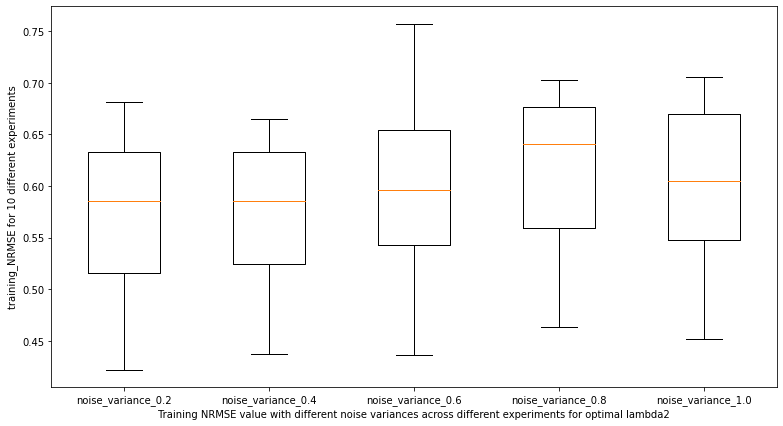

In [ ]:
fig = plt.figure(figsize=(13,7))
plt.boxplot([training_NRMSE_noise_variance_optimal_lambda2[:,0],training_NRMSE_noise_variance_optimal_lambda2[:,1],training_NRMSE_noise_variance_optimal_lambda2[:,2],training_NRMSE_noise_variance_optimal_lambda2[:,3],training_NRMSE_noise_variance_optimal_lambda2[:,4]])
plt.ylabel('training_NRMSE for 10 different experiments')
plt.xticks([1,2,3,4,5], labels = ['noise_variance_0.2', 'noise_variance_0.4','noise_variance_0.6','noise_variance_0.8','noise_variance_1.0'])
plt.xlabel(' Training NRMSE value with different noise variances across different experiments for optimal lambda2 ')
plt.show()

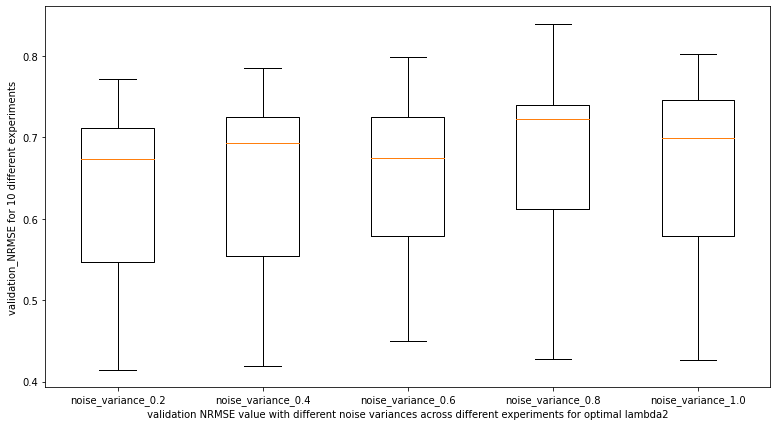

In [ ]:
fig = plt.figure(figsize=(13,7))
plt.boxplot([validation_NRMSE_noise_variance_optimal_lambda2[:,0],validation_NRMSE_noise_variance_optimal_lambda2[:,1],validation_NRMSE_noise_variance_optimal_lambda2[:,2],validation_NRMSE_noise_variance_optimal_lambda2[:,3],validation_NRMSE_noise_variance_optimal_lambda2[:,4]])
plt.ylabel('validation_NRMSE for 10 different experiments')
plt.xticks([1,2,3,4,5], labels = ['noise_variance_0.2', 'noise_variance_0.4','noise_variance_0.6','noise_variance_0.8','noise_variance_1.0'])
plt.xlabel(' validation NRMSE value with different noise variances across different experiments for optimal lambda2 ')
plt.show()

In [ ]:
optimal_lambda2_for_different_experiments

array([[0.1 , 0.01, 0.1 , 0.01, 0.1 ],
       [0.01, 0.01, 0.01, 0.01, 0.1 ],
       [0.1 , 0.1 , 0.1 , 0.1 , 0.1 ],
       [0.1 , 0.1 , 1.  , 0.1 , 0.1 ],
       [0.1 , 0.1 , 0.1 , 1.  , 0.1 ],
       [0.1 , 0.1 , 0.1 , 0.01, 0.1 ],
       [0.01, 0.01, 0.01, 0.1 , 0.01],
       [0.1 , 0.1 , 0.1 , 0.1 , 0.01],
       [1.  , 0.1 , 1.  , 1.  , 1.  ],
       [0.1 , 0.1 , 0.1 , 0.1 , 0.1 ]])

Question 13(n) : The approach is same as 13(m) but here optimal lambda1 value has been found out

In [ ]:
noise_variance_list = []  ## it stores the  number of noise variances for different experiment
for i in range(training_number):
  noise_variances = float(input('Enter the noise variances : '))  ## it stores number the training and validation variables for a particular experiment
  noise_variance_list.append(noise_variances)

Enter the noise variances : 0.2
Enter the noise variances : 0.4
Enter the noise variances : 0.6
Enter the noise variances : 0.8
Enter the noise variances : 1.0


In [ ]:
lambda1_list = []  ## it stores the  number of lambda2 values for different experiment
for i in range(training_number):
  lambda1_values = float(input('Enter lambda1 value : '))  ## it stores lambda1 value for a particular experiment
  lambda1_list.append(lambda1_values)

Enter lambda1 value : 0.01
Enter lambda1 value : 0.1
Enter lambda1 value : 1.0
Enter lambda1 value : 10.0
Enter lambda1 value : 100.0


In [ ]:
optimal_lambda1_for_different_experiments = np.zeros((len(seed), training_number))
training_NRMSE_noise_variance_optimal_lambda1 = np.zeros((len(seed), training_number)) ## this list stores the NRMSE values for different training variables for optimal value of lambda2
validation_NRMSE_noise_variance_optimal_lambda1 = np.zeros((len(seed), training_number))  ## this list stores the NRMSE values with different training samples for validation set for optimal value of lambda2
n_training = int(input('Enter the number of training samples : '))  ## it stores the number of training samples
features = int(input('Enter the number of features : '))  ## it stores the number of training and validation set features
for k in range(len(seed)):
  np.random.seed(seed[k])
  optimal_lambda1 = []
  training_NRMSE_with_noise_variance_optimal_lambda1 = [] ## this list stores the NRMSE values for different training variables for optimal value of lambda1
  validation_NRMSE_with_noise_variance_optimal_lambda1 = []  ## this list stores the NRMSE values with different training samples for validation set for optimal value of lambda1
  W1_variance = np.random.randn(features + 1)
  W2_variance = np.random.randn(features + 1)
  X_train = data_matrix(n_training , features)
  X0_train = np.ones((n_training , 1))
  X_train_new = np.hstack((X0_train , X_train)) ## adding a new column for incorporating the bias value in the validation_set
  X_validation = data_matrix(int(n_training*0.2) , features)
  X0_validation = np.ones((int(n_training*0.2) , 1))
  X_validation_new = np.hstack((X0_validation , X_validation)) ## adding a new column for incorporating the bias value in the validation_set
  for i in noise_variance_list:
    training_NRMSE_with_noise_variance = [] ## this list stores the NRMSE values for different training variables
    validation_NRMSE_with_noise_variance = []  ## this list stores the NRMSE values with different training samples for validation set
    for j in lambda1_list:
      t_training = target(X_train_new , W1_variance , (i**0.5))
      y_training = output(X_train_new , W2_variance)
      t_validation = target(X_validation_new , W1_variance , (i**0.5))
      initial_MSE_variance = MSE(n_training,t_training,y_training)
      initial_NRMSE_variance = np.sqrt(initial_MSE_variance) / np.std(t_training)
      Final_W_training, Final_output_training, Final_NRMSE_training = Linear_Regression(X_train_new, t_training , y_training , W2_variance , 100 , initial_NRMSE_variance , lambda1 = j, lambda2= 0.0 )
      y_validation = output( X_validation_new, Final_W_training )
      MSE_validation = MSE(int(n_training*0.2), t_validation , y_validation)
      NRMSE_validation_value = np.sqrt(MSE_validation) / np.std(t_validation)
      training_NRMSE_with_noise_variance.append(Final_NRMSE_training)
      validation_NRMSE_with_noise_variance.append(NRMSE_validation_value)
    optimal_lambda1.append(lambda1_list[validation_NRMSE_with_noise_variance.index(min(validation_NRMSE_with_noise_variance))])
    training_NRMSE_with_noise_variance_optimal_lambda1.append(training_NRMSE_with_noise_variance[validation_NRMSE_with_noise_variance.index(min(validation_NRMSE_with_noise_variance))])
    validation_NRMSE_with_noise_variance_optimal_lambda1.append(min(validation_NRMSE_with_noise_variance))
  training_NRMSE_noise_variance_optimal_lambda1[k,:] = training_NRMSE_with_noise_variance_optimal_lambda1
  validation_NRMSE_noise_variance_optimal_lambda1[k,:] = validation_NRMSE_with_noise_variance_optimal_lambda1
  optimal_lambda1_for_different_experiments[k,:] = optimal_lambda1


Enter the number of training samples : 100
Enter the number of features : 10


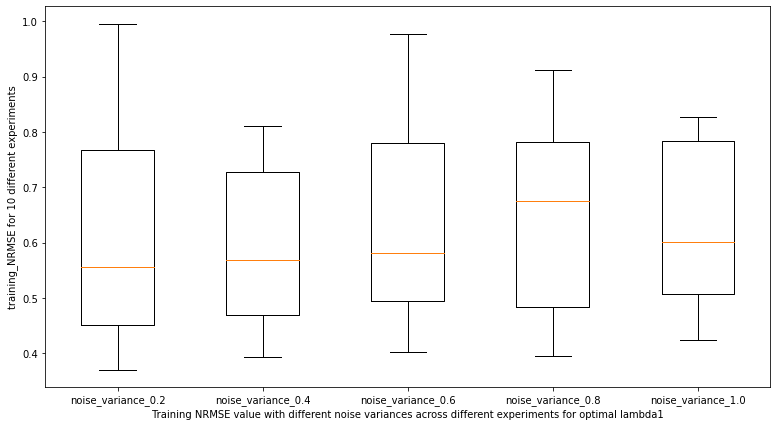

In [ ]:
fig = plt.figure(figsize=(13,7))
plt.boxplot([training_NRMSE_noise_variance_optimal_lambda1[:,0],training_NRMSE_noise_variance_optimal_lambda1[:,1],training_NRMSE_noise_variance_optimal_lambda1[:,2],training_NRMSE_noise_variance_optimal_lambda1[:,3],training_NRMSE_noise_variance_optimal_lambda1[:,4]])
plt.ylabel('training_NRMSE for 10 different experiments')
plt.xticks([1,2,3,4,5], labels = ['noise_variance_0.2', 'noise_variance_0.4','noise_variance_0.6','noise_variance_0.8','noise_variance_1.0'])
plt.xlabel(' Training NRMSE value with different noise variances across different experiments for optimal lambda1 ')
plt.show()

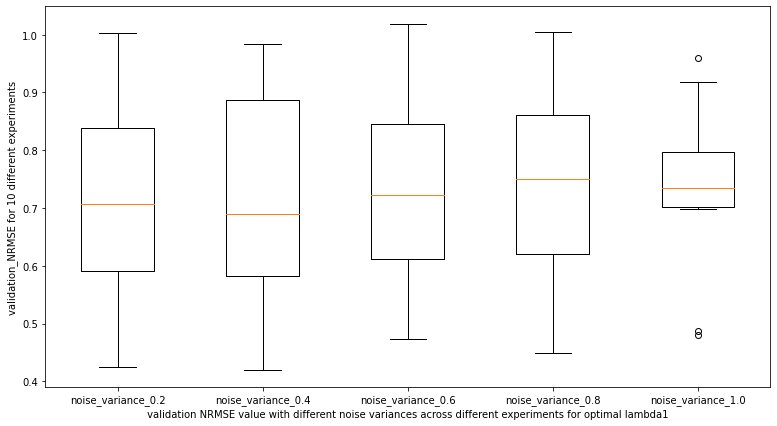

In [ ]:
fig = plt.figure(figsize=(13,7))
plt.boxplot([validation_NRMSE_noise_variance_optimal_lambda1[:,0],validation_NRMSE_noise_variance_optimal_lambda1[:,1],validation_NRMSE_noise_variance_optimal_lambda1[:,2],validation_NRMSE_noise_variance_optimal_lambda1[:,3],validation_NRMSE_noise_variance_optimal_lambda1[:,4]])
plt.ylabel('validation_NRMSE for 10 different experiments')
plt.xticks([1,2,3,4,5], labels = ['noise_variance_0.2', 'noise_variance_0.4','noise_variance_0.6','noise_variance_0.8','noise_variance_1.0'])
plt.xlabel(' validation NRMSE value with different noise variances across different experiments for optimal lambda1 ')
plt.show()